Name : Jagadeesh Nadimpalli  
IdentiKey: jana3207

# Analysis of Walmart Sales using Statistical Techniques

## Data Description

Overview:
The Walmart Store Sales Dataset provides sales data from 45 Walmart stores located in various regions of the United States. The dataset covers the time period from February 5, 2010, to November 1, 2012. The data is utilised for the purpose of forecasting sales and demand, specifically during crucial holiday weeks when sales increases are expected.

Features:
1. `Store`: A unique identifier assigned to each of the 45 Walmart stores. The stores are assigned sequential numbers ranging from 1 to 45.
2. `Date`: The date that corresponds to the week of sales. The data records weekly sales figures, offering valuable insights into weekly patterns.
3. `Weekly_Sales`: The total sales amount for a given store in a specific week. This is the response variable for predictive modeling.
4. `Holiday_Flag`: A binary indicator where '1' indicates a holiday week and '0' indicates a non-holiday week.Holiday weeks include special events such as the Super Bowl, Labour Day, Thanksgiving, and Christmas.
5. `Temperature`: The local temperature on the day of the sale, which could impact sales trends.
6. `Fuel_Price`: The price of fuel in the specific area on the day of purchase. Fluctuations in fuel prices can have a significant impact on both the purchasing power of consumers and the expenses associated with transportation and distribution.
7. `CPI`: The Consumer Price Index for the region at the time of sale, which measures the level of inflation and economic conditions that could affect sales.
8. `Unemployment`: The unemployment rate in the region at the time of sale, which can affect consumer spending habits.

- Holiday Events:
  - Super Bowl: February 12, 2010, February 11, 2011, February 10, 2012, and February 8, 2013.
  - Labour Day: September 10, 2010, September 9, 2011, September 7, 2012, and September 6, 2013.
  - Thanksgiving: November 26, 2010, November 25, 2011, November 23, 2012, and November 29, 2013.
  - Christmas: December 31, 2010, December 30, 2011, December 28, 2012, and December 27, 2013.


- This dataset is particularly useful for building machine learning models to predict future sales, examining the influence of economic indicators on sales, and strategizing inventory and staffing for anticipated surges during holiday seasons. Markdown events and promotions, which precede major holidays, are critical in the analysis as they significantly influence weekly sales figures.

- Dataset Link : https://www.kaggle.com/datasets/yasserh/walmart-dataset/data

## **Problem Statement**:

What are the most important factors influencing weekly sales at Walmart, and how do seasonal variations, specific holidays, and economic indicators such as CPI and fuel prices affect consumer spending patterns and sales performance across store locations?

In [ ]:
#installing necessary packages
install.packages("lubridate")
install.packages('gridExtra')
install.packages('corrplot')
install.packages("leaps")
install.packages('MASS')
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
#importing necessary libraries
library(tidyverse)
library(ggplot2)
library(lubridate)
library(gridExtra)
library(corrplot)
library(leaps)
library(MASS)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.92 loaded


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
#reading the csv file
walmart_data = read.csv("/content/Walmart.csv")
head(walmart_data)

Store Date       Weekly_Sales Holiday_Flag Temperature Fuel_Price CPI     
1 1     5/2/10     1643691      0            42.31       2.572      211.0964
2 1     12/2/10    1641957      1            38.51       2.548      211.2422
3 1     19-02-2010 1611968      0            39.93       2.514      211.2891
4 1     26-02-2010 1409728      0            46.63       2.561      211.3196
5 1     5/3/10     1554807      0            46.50       2.625      211.3501
6 1     12/3/10    1439542      0            57.79       2.667      211.3806
  Unemployment
1 8.106       
2 8.106       
3 8.106       
4 8.106       
5 8.106       
6 8.106

## Data Cleaning

- The data cleaning process is crucial for every dataset, and it involves the following steps:
  - Lowering the column names
  - check for null values and remove them
  - if there is datatype mismatch of a column convert it (datatype conversions)
  - check for  duplicates and remove them
  - reordering the columns (move the dependent variable to last)
  - check for outlier and remove them

- We follow to the above sequence in order to prepare our data for analysis.

In [ ]:
#checking the dimensions of the dataset (shape)
dim(walmart_data)

[1] 6435    8

In [ ]:
#checking for data types of each column in the dataframe
str(walmart_data)

'data.frame':	6435 obs. of  8 variables:
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr  "5/2/10" "12/2/10" "19-02-2010" "26-02-2010" ...
 $ Weekly_Sales: num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag: int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...


In [ ]:
#lowercasing the column names of the dataframe
names(walmart_data) = tolower(names(walmart_data))

In [ ]:
#checking for null values
print(colSums(is.na(walmart_data)))

       store         date weekly_sales holiday_flag  temperature   fuel_price 
           0            0            0            0            0            0 
         cpi unemployment 
           0            0 


- Since the date column contains various formats, it is necessary to convert all values in the data column to the date data type and organise them to the format year-month-day.

In [ ]:
# convert date column of string type to date type using lubricant library
walmart_data$date = gsub("-", "/", walmart_data$date)
walmart_data$date = parse_date_time(walmart_data$date, orders = c("d/m/y", "d/m/Y"))
walmart_data$date = format(walmart_data$date, "%m-%d-%Y")
walmart_data$date = as.Date(walmart_data$date,'%m-%d-%Y')

In [ ]:
#converting the store and holiday_flag variables to factor variables
walmart_data$store = factor(walmart_data$store)
walmart_data$holiday_flag = factor(walmart_data$holiday_flag, levels = c(0, 1), labels = c("non_holiday_week", "holiday_week"))

In [ ]:
#reorder the weekly_sales column to last
walmart_data = walmart_data[, c('store', 'date', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'weekly_sales')]

In [ ]:
#checking for duplicated rows
sum(duplicated(walmart_data))

[1] 0

In [ ]:
#extracting the response variable and predictors into different variables
response_variable = names(walmart_data)[8]
features = names(walmart_data)[-8]

- The dataset does not contain any null values or duplicated values, as indicated by the results above.

- We have converted the `store` and `holidayflag` columns to factor variables in R because they appear to have categorical values. According to the dataset description, we have changed the values of `holidayflag` to 0 for non-holiday weeks and 1 for holiday weeks.

In [ ]:
#checking the data after cleaning and also datatypes
head(walmart_data)

store date       holiday_flag     temperature fuel_price cpi     
1 1     2010-02-05 non_holiday_week 42.31       2.572      211.0964
2 1     2010-02-12 holiday_week     38.51       2.548      211.2422
3 1     2010-02-19 non_holiday_week 39.93       2.514      211.2891
4 1     2010-02-26 non_holiday_week 46.63       2.561      211.3196
5 1     2010-03-05 non_holiday_week 46.50       2.625      211.3501
6 1     2010-03-12 non_holiday_week 57.79       2.667      211.3806
  unemployment weekly_sales
1 8.106        1643691     
2 8.106        1641957     
3 8.106        1611968     
4 8.106        1409728     
5 8.106        1554807     
6 8.106        1439542

In [ ]:
str(walmart_data)

'data.frame':	6435 obs. of  8 variables:
 $ store       : Factor w/ 45 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ date        : Date, format: "2010-02-05" "2010-02-12" ...
 $ holiday_flag: Factor w/ 2 levels "non_holiday_week",..: 1 2 1 1 1 1 1 1 1 1 ...
 $ temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ fuel_price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ cpi         : num  211 211 211 211 211 ...
 $ unemployment: num  8.11 8.11 8.11 8.11 8.11 ...
 $ weekly_sales: num  1643691 1641957 1611968 1409728 1554807 ...


In [ ]:
#extracting the numerical columns from the dataset
num_features = sapply(walmart_data, is.numeric)
num_features = names(walmart_data)[num_features]
num_features

[1] "temperature"  "fuel_price"   "cpi"          "unemployment" "weekly_sales"

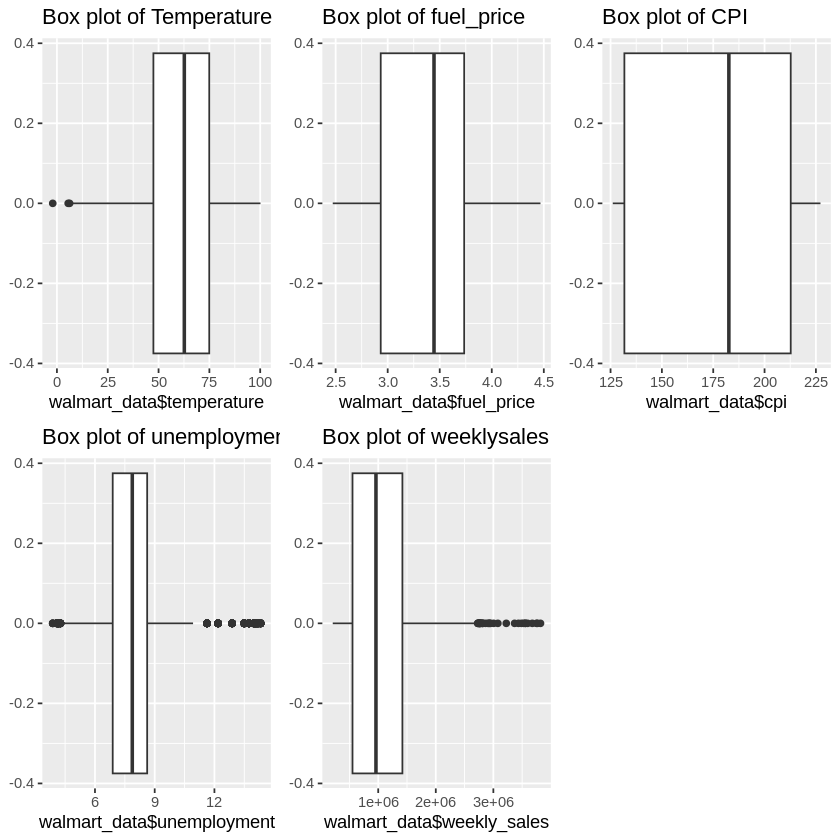

In [ ]:
#plotting the box plots for all numerical features to check for the outlier in the data and remove them
plot_temp = ggplot()+
  geom_boxplot(aes(x = walmart_data$temperature))+
  ggtitle("Box plot of Temperature")

plot_fp = ggplot()+
  geom_boxplot(aes(x = walmart_data$fuel_price))+
  ggtitle("Box plot of fuel_price")

plot_cpi = ggplot()+
  geom_boxplot(aes(x = walmart_data$cpi))+
  ggtitle("Box plot of CPI")

plot_uemp = ggplot()+
  geom_boxplot(aes(x = walmart_data$unemployment))+
  ggtitle("Box plot of unemployment")

plot_ws = ggplot()+
  geom_boxplot(aes(x = walmart_data$weekly_sales))+
  ggtitle("Box plot of weeklysales")

grid.arrange(plot_temp, plot_fp, plot_cpi, plot_uemp, plot_ws, ncol = 3, nrow = 2)

- The boxplots of the numerical columns indicate the presence of outliers. These outliers may affect the data analysis process. To address this we will remove the outliers using the Interquartile Range (IQR) method.

In [ ]:
cat("\nInference:\nBefore removal of outliers, The dataset had", nrow(walmart_data), "samples.\n")

num_f = num_features[-(length(num_features))]
for(i in num_f) {
  Q1 = quantile(walmart_data[[i]], 0.25, na.rm = TRUE)
  Q3 = quantile(walmart_data[[i]], 0.75, na.rm = TRUE)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  walmart_data = subset(walmart_data, walmart_data[[i]] <= upper_bound & walmart_data[[i]] >= lower_bound)
}

cat("After removal of outliers, The dataset now has", nrow(walmart_data), "samples.\n")



Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5951 samples.


- We have removed the outliers by employing the Interquartile Range (IQR) method. If the data points fall within the upper and lower bounds of the IQR we keep them. Otherwise we classify those data points as outliers and exclude them.

- The original dataset consisted of 6435 samples. After removing the outliers, we were left with 5951 samples resulting in the removal of 484 outliers.

## Exploratory Data Analysis

- Let exlpore the relationships between the predictors and response variables using visualizations to get to understand the data better.

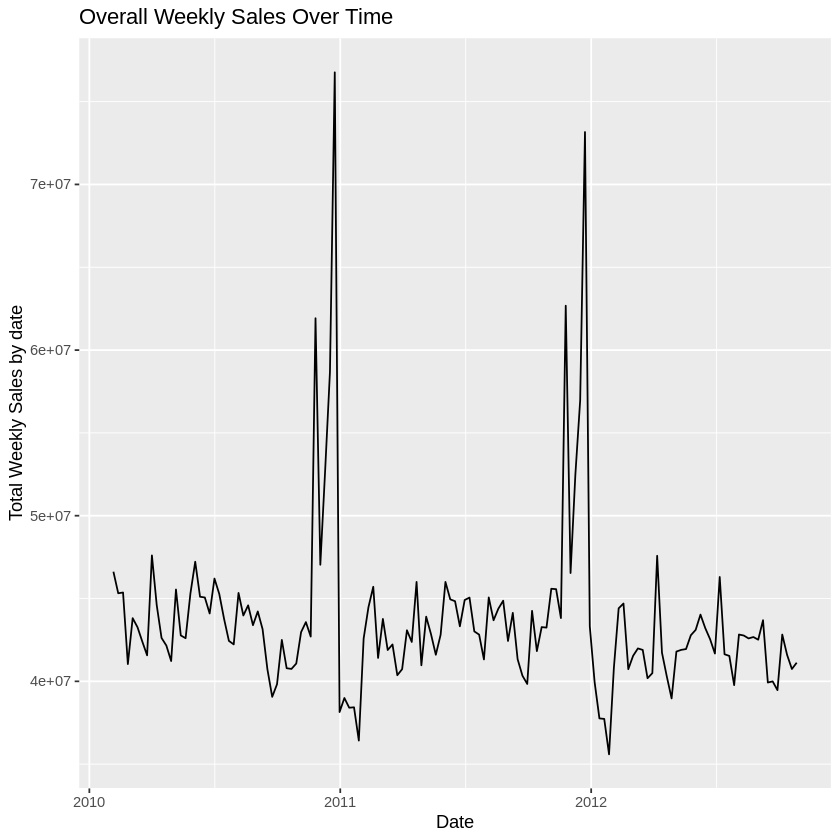

In [ ]:
# Plotting overall sales over time
sales_by_date = aggregate(weekly_sales ~ date, data = walmart_data, sum)
ggplot(sales_by_date,aes(x = date,y=weekly_sales))+
  geom_line()+
  ggtitle("Overall Weekly Sales Over Time")+
  xlab("Date")+
  ylab("Total Weekly Sales by date")

- The line chart shows spikes at specific intervals which indicates the possibility of substantial increases in sales during holiday seasons or periods of special promotion. The weekly fluctuations may be due to the weekly cycles of shopping behaviour.

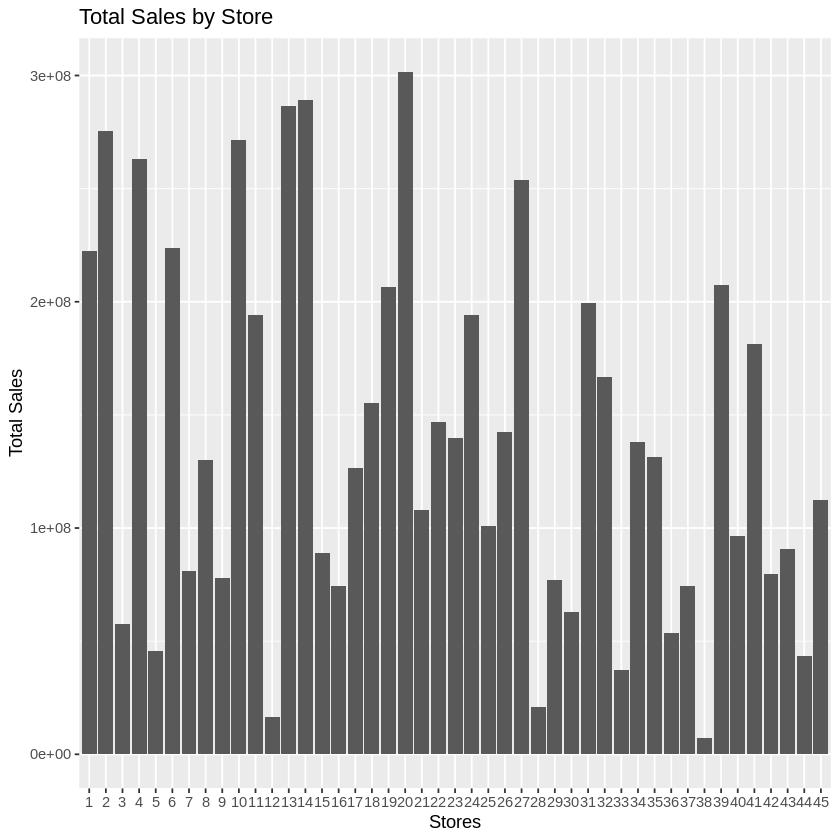

In [ ]:
#plotting sales by each store
sales_by_store = aggregate(weekly_sales ~ store, data=walmart_data, sum)
ggplot(sales_by_store, aes(x=factor(store), y=weekly_sales)) +
  geom_bar(stat="identity") +
  ggtitle("Total Sales by Store")+
  xlab("Stores")+
  ylab("Total Sales")


- The bar chart of Walmart's store sales provides a clear representation of the stores that are excelling in performance, influenced by factors such as size, location, demographics, or management efficiency. This can be valuable in determining and examining the factors contributing to disparities in performance.

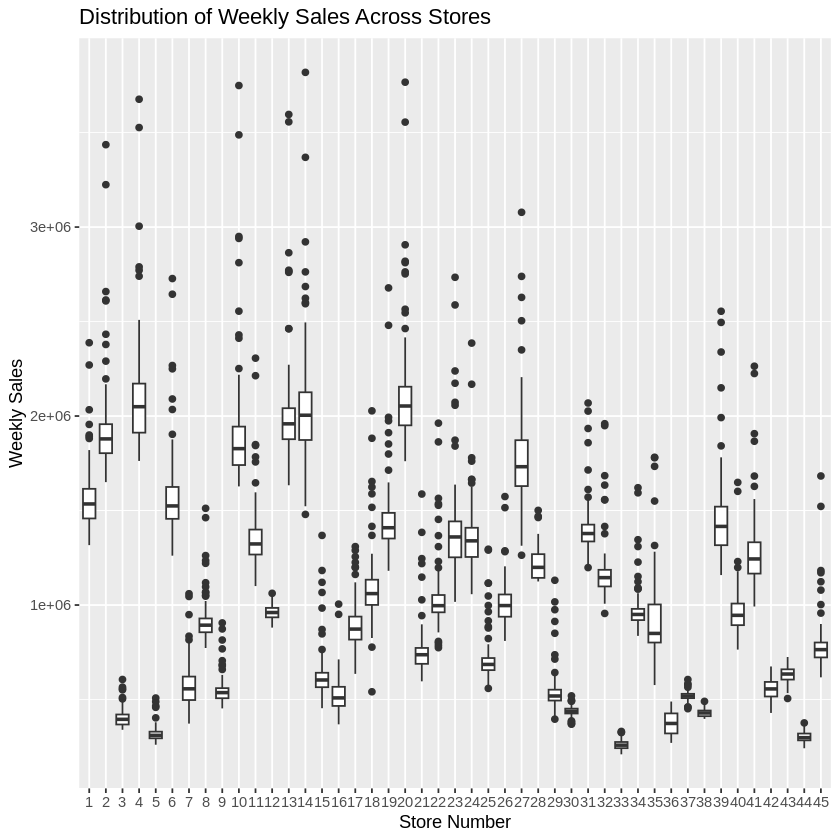

In [ ]:
#plotting boxplot of sales vs weeklysales
ggplot(walmart_data, aes(x=store, y=weekly_sales)) +
  geom_boxplot() +
  ggtitle("Distribution of Weekly Sales Across Stores")+
  xlab("Store Number")+
  ylab("Weekly Sales")

- The above boxplot illustrates the distribution of weekly sales for each store. The store's performance exhibits significant heterogeneity, as shown by the variability in both the median and the interquartile range.

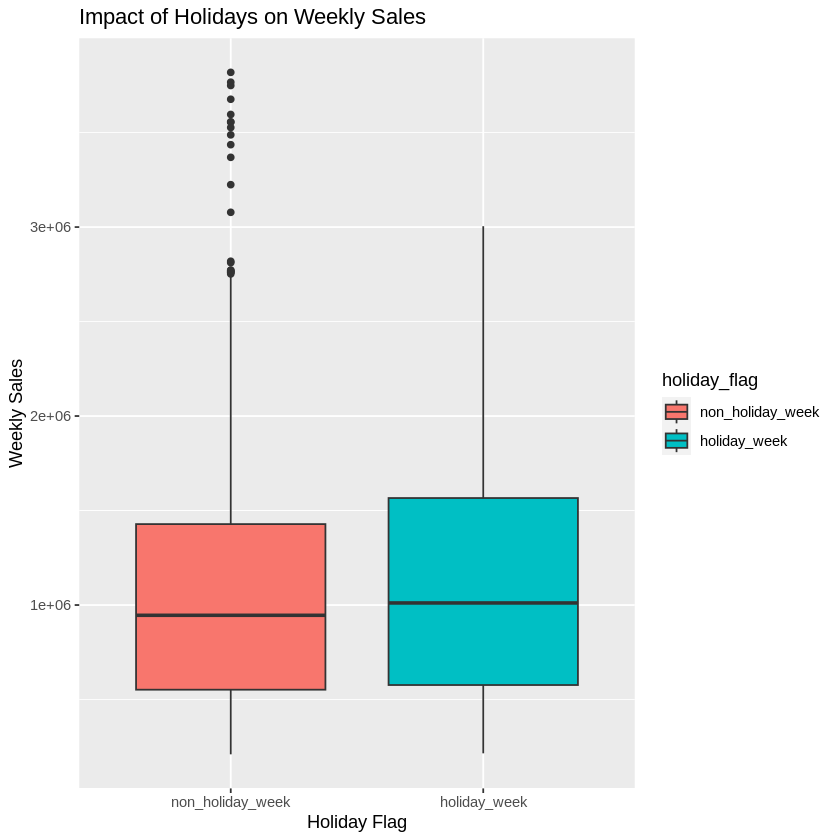

In [ ]:
ggplot(walmart_data, aes(x=holiday_flag, y=weekly_sales, fill=holiday_flag)) +
  geom_boxplot() +
  ggtitle("Impact of Holidays on Weekly Sales")+
  xlab("Holiday Flag")+
  ylab("Weekly Sales")

- The boxplots illustrate the contrast in weekly sales between holiday and non-holiday weeks. During holiday weeks, there is a noticeable rise in the median sales figure and a wider range of values.
The occurrence of outliers particularly during non-holiday weeks suggests the presence of exceptional values that can be explained by highly effective sales promotions.

`geom_smooth()` using formula = 'y ~ x'


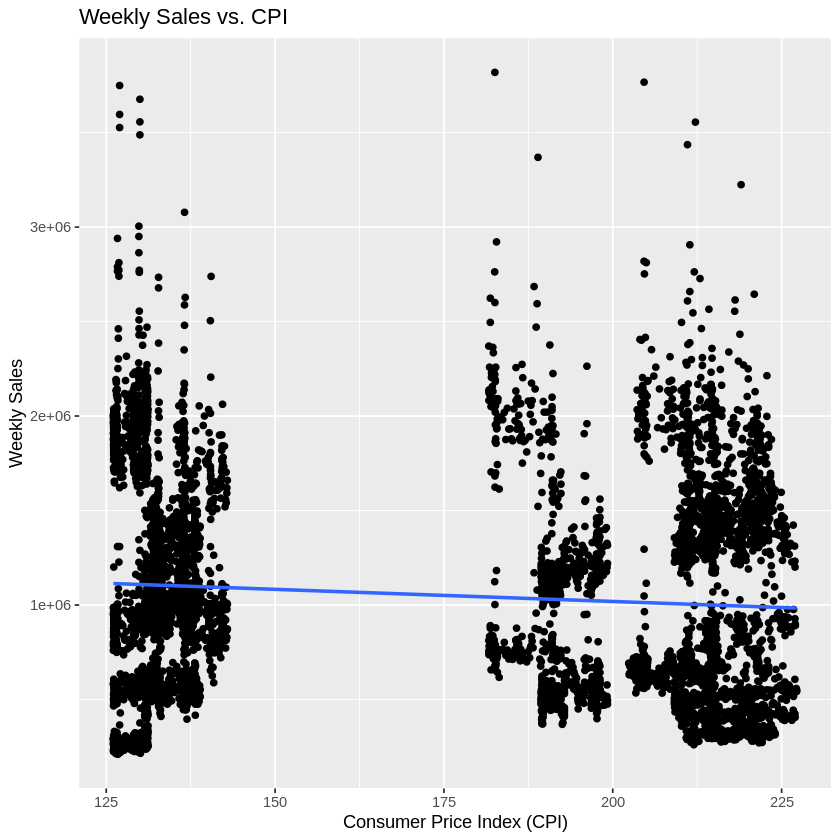

In [ ]:
# Sales vs. CPI
ggplot(walmart_data, aes(x=cpi, y=weekly_sales)) +
  geom_point()+
  geom_smooth(method='lm',se = F) +
  ggtitle("Weekly Sales vs. CPI")+
  xlab("Consumer Price Index (CPI)")+
  ylab("Weekly Sales")

- There isn't a clear linear relationship between the CPI and weekly sales in the scatterplot. This means that the CPI may not be a strong predictor of weekly sales on its own.
The data points are spread out which means there is a lot of variation. This means we need to look into more complex models or other factors that could interact with CPI to affect sales.

`geom_smooth()` using formula = 'y ~ x'


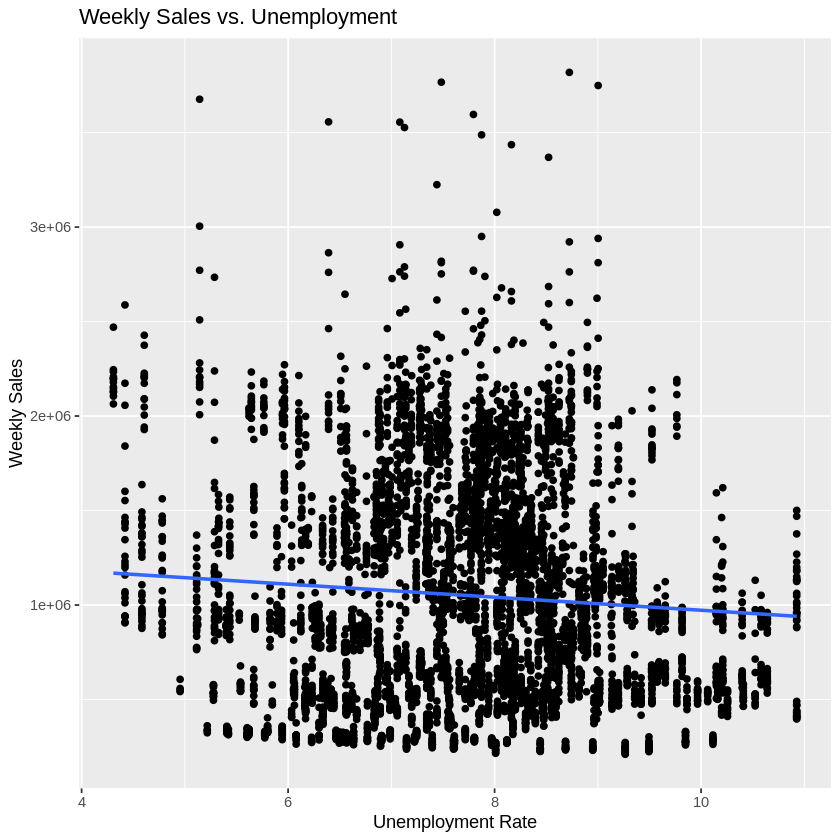

In [ ]:
# Sales vs. Unemployment
ggplot(walmart_data, aes(x=unemployment, y=weekly_sales)) +
  geom_point() +
  geom_smooth(method='lm',se= F )+
  ggtitle("Weekly Sales vs. Unemployment")+
  xlab("Unemployment Rate")+
  ylab("Weekly Sales")

- Like the CPI plot, this scatterplot shows no apparent correlation between the unemployment rate and weekly sales. There may however be a slight downward trend, which suggests that higher unemployment rates may be related to lower sales.But, the pattern could be more robust which means that the unemployment rate should be considered along with other variables.

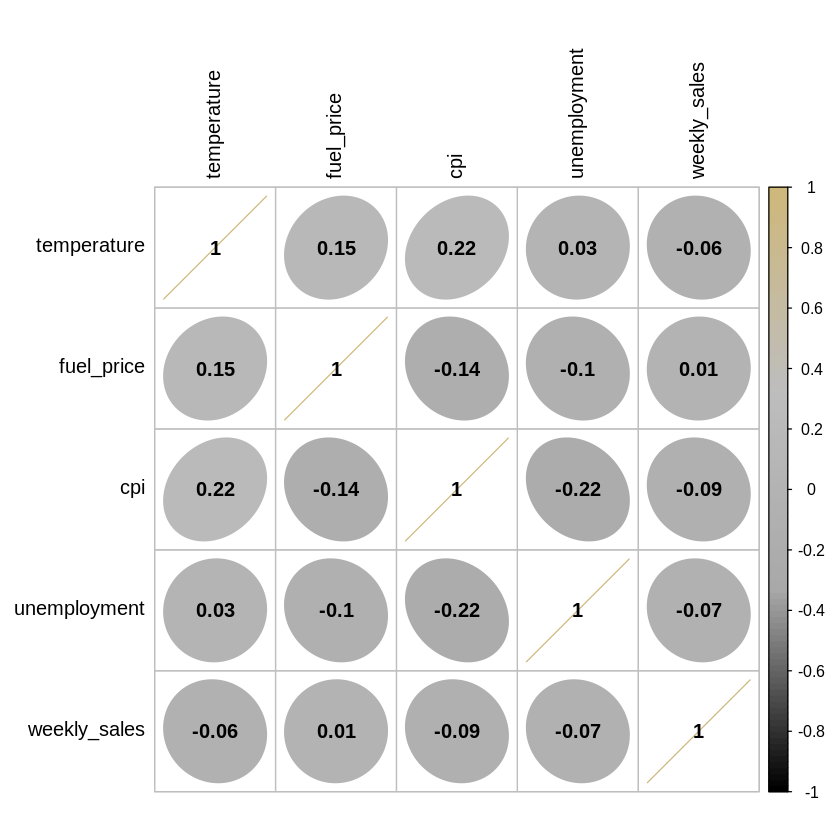

In [ ]:
#plotting the correlation matrix of the walmart dataset of numerical features
cor_matrix = cor(walmart_data[, num_features], use = "complete.obs")
col4 = colorRampPalette(c("black", "darkgrey", "grey", "#CFB87C"))
corrplot(cor_matrix, method="ellipse", col=col4(100), addCoef.col="black", tl.col="black")

- As shown in the correlation matrix above, there is no statistically significant relationship between any of the variables and weekly sales.  Certain independent variables such as temperature and CPI are not highly correlated.
By pointing out possible multicollinearity issues and helping with feature selection this matrix can help with regression modelling.

## Data Transformation

- In the data transformation phase, we are conducting feature scaling, one-hot encoding, and then splitting the data into training and testing sets after the encoding process.
- We will perform one-hot encoding in the subsequent part of the process.

### One-hot Encoding Categorical columns

- During the data transformation phase, the following two code blocks handle the conversion of categorical variables into one-hot encoding dummy variables. This is achieved by excluding the first level of the factor variable to prevent multicollinearity. The resulting variables are then merged with the original data, and the original columns such as "store" and "holidayflag" are removed. Additionally,incorporating store dummy variables for each store number, as well as holidayflag variables such as holidayflagholidayweek.

In [ ]:
#one-hot encoding for the factor variables(store and holiday_flag)
store_dummies = model.matrix(~ store, data = walmart_data)[,-1]
holiday_flag_dummies = model.matrix(~ holiday_flag-1, data = walmart_data)
store_dummies = as.tibble(store_dummies)
holiday_flag_dummies = as.tibble(holiday_flag_dummies)
holiday_flag_dummies = holiday_flag_dummies[2]
head(store_dummies)
head(holiday_flag_dummies)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


store2 store3 store4 store5 store6 store7 store8 store9 store10 store11 ⋯
1 0      0      0      0      0      0      0      0      0       0       ⋯
2 0      0      0      0      0      0      0      0      0       0       ⋯
3 0      0      0      0      0      0      0      0      0       0       ⋯
4 0      0      0      0      0      0      0      0      0       0       ⋯
5 0      0      0      0      0      0      0      0      0       0       ⋯
6 0      0      0      0      0      0      0      0      0       0       ⋯
  store36 store37 store38 store39 store40 store41 store42 store43 store44
1 0       0       0       0       0       0       0       0       0      
2 0       0       0       0       0       0       0       0       0      
3 0       0       0       0       0       0       0       0       0      
4 0       0       0       0       0       0       0       0       0      
5 0       0       0       0       0       0       0       0       0      
6 0       0       0       0       0       0       0       0       0      
  store45
1 0      
2 0      
3 0      
4 0      
5 0      
6 0

holiday_flagholiday_week
1 0                       
2 1                       
3 0                       
4 0                       
5 0                       
6 0

In [ ]:
#merging the walmart data with encoded variables(store and holiday_flag) and dropping the original variables
walmart_data_e = cbind(store_dummies, holiday_flag_dummies,walmart_data)
walmart_data_e$store = NULL
walmart_data_e$holiday_flag = NULL
head(walmart_data_e)

store2 store3 store4 store5 store6 store7 store8 store9 store10 store11 ⋯
1 0      0      0      0      0      0      0      0      0       0       ⋯
2 0      0      0      0      0      0      0      0      0       0       ⋯
3 0      0      0      0      0      0      0      0      0       0       ⋯
4 0      0      0      0      0      0      0      0      0       0       ⋯
5 0      0      0      0      0      0      0      0      0       0       ⋯
6 0      0      0      0      0      0      0      0      0       0       ⋯
  store43 store44 store45 holiday_flagholiday_week date       temperature
1 0       0       0       0                        2010-02-05 42.31      
2 0       0       0       1                        2010-02-12 38.51      
3 0       0       0       0                        2010-02-19 39.93      
4 0       0       0       0                        2010-02-26 46.63      
5 0       0       0       0                        2010-03-05 46.50      
6 0       0       0       0                        2010-03-12 57.79      
  fuel_price cpi      unemployment weekly_sales
1 2.572      211.0964 8.106        1643691     
2 2.548      211.2422 8.106        1641957     
3 2.514      211.2891 8.106        1611968     
4 2.561      211.3196 8.106        1409728     
5 2.625      211.3501 8.106        1554807     
6 2.667      211.3806 8.106        1439542

In [ ]:
#extracting the numerical columns of the train data
num_train_f = sapply(walmart_data_e, is.numeric)
num_train_f = names(walmart_data_e)[num_train_f]
num_train_f

[1] "store2"                   "store3"                  
 [3] "store4"                   "store5"                  
 [5] "store6"                   "store7"                  
 [7] "store8"                   "store9"                  
 [9] "store10"                  "store11"                 
[11] "store12"                  "store13"                 
[13] "store14"                  "store15"                 
[15] "store16"                  "store17"                 
[17] "store18"                  "store19"                 
[19] "store20"                  "store21"                 
[21] "store22"                  "store23"                 
[23] "store24"                  "store25"                 
[25] "store26"                  "store27"                 
[27] "store28"                  "store29"                 
[29] "store30"                  "store31"                 
[31] "store32"                  "store33"                 
[33] "store34"                  "store35"                 
[35] "store36"                  "store37"                 
[37] "store38"                  "store39"                 
[39] "store40"                  "store41"                 
[41] "store42"                  "store43"                 
[43] "store44"                  "store45"                 
[45] "holiday_flagholiday_week" "temperature"             
[47] "fuel_price"               "cpi"                     
[49] "unemployment"             "weekly_sales"

## Statistical Analysis

- In this statistical analysis, I am dividing the primary problem statement into subproblems. And by solving the all the subproblems using statistical techniques I am providing an answer to the research question or problem statement.


### Statistical Technique 1: Hypothesis Testing

Objective: To determine if there's a significant difference in average weekly sales during holiday weeks compared to non-holiday weeks.

- To solve this firstly Defining Hypothesis   
  - Null Hypothesis (H0): There is no difference in average weekly sales between holiday weeks and non-holiday weeks.

    $$\mu_{holiday} = \mu_{non-holiday}$$  
  - Alternative Hypothesis (H1): There is a difference in average weekly sales between holiday weeks and non-holiday weeks.

  $$\mu_{holiday} \neq \mu_{non-holiday}$$  
  - where $\mu_{holiday}$ and $\mu_{non-holiday}$ are the population means of weekly sales during holiday weeks and non-holiday weeks, respectively.

- To conduct the analysis above, the appropriate approach would be to utilise the t-test in order to determine if there are any statistically significant findings. The T-test yields a p-value, which allows us to determine whether to reject or fail to reject the null hypothesis.

In [ ]:
#extracting the holiday sales and non-holidays from the walmart data
holiday_sales = walmart_data_e$weekly_sales[walmart_data_e$holiday_flagholiday_week == 1]
non_holiday_sales = walmart_data_e$weekly_sales[walmart_data_e$holiday_flagholiday_week == 0]

result = t.test(holiday_sales,non_holiday_sales)


cat("----------Result of Hypothesis :\n")
print(result)

if (result$p.value < 0.05)
{
  cat("Reject the null hypothesis\n")
} else
{
  cat("Fail to reject the null hypothesis\n")
}

----------Result of Hypothesis :

	Welch Two Sample t-test

data:  holiday_sales and non_holiday_sales
t = 2.5678, df = 468.6, p-value = 0.01054
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  19276.42 144960.90
sample estimates:
mean of x mean of y 
  1127361   1045243 

Reject the null hypothesis


**Interpretation of Hypothesis test:**
- The results of t-test show a t-value of 2.5678 and a p-value of 0.01054.The p-value was below the significance level of 0.05, which tell us that we can reject null hypothesis. There is a notable difference in average weekly sales between holiday weeks and non-holiday weeks.
- Sales are higher around the holidays for a reason that isn't random chance.

### Statistical Technique 2: Confidence Intervals

Objective : Estimating confidence intervals for mean weekly sales during Super Bowl, Labor Day, Thanksgiving, and Christmas.

- To calculate the confidence interval, I will first gather the sales data for each holiday and event based on the provided dates. Then, I will apply a t-test to analyse the sales for each holiday and determine the confidence interval for each one.

In [ ]:
superbowl_dates = as.Date(c("2010-02-12", "2011-02-11", "2012-02-10"))
laborday_dates = as.Date(c("2010-09-10", "2011-09-09", "2012-09-07"))
thanksgiving_dates = as.Date(c("2010-11-26", "2011-11-25", "2012-11-23"))
christmas_dates = as.Date(c("2010-12-31", "2011-12-30", "2012-12-28"))

#extracting weekly sales of those above dates from the train_walmart

superbowl_sales = walmart_data_e$weekly_sales[walmart_data_e$date %in% superbowl_dates]
laborday_sales = walmart_data_e$weekly_sales[walmart_data_e$date %in% laborday_dates]
thanksgiving_sales = walmart_data_e$weekly_sales[walmart_data_e$date %in% thanksgiving_dates]
chirstmas_sales = walmart_data_e$weekly_sales[walmart_data_e$date %in% christmas_dates]

#calculating CI for every holiday sales:
t_test_superbowl = t.test(superbowl_sales)
t_test_laborday = t.test(laborday_sales)
t_test_thanksgiving= t.test(thanksgiving_sales)
t_test_christmas = t.test(chirstmas_sales)

print("Confidence interval for superblow :")
print(t_test_superbowl)

print("Confidence interval for laborday :")
print(t_test_laborday)

print("Confidence interval for thanksgiving :")
print(t_test_thanksgiving)

print("Confidence interval for chirstmas :")
print(t_test_christmas)

[1] "Confidence interval for superblow :"

	One Sample t-test

data:  superbowl_sales
t = 20.497, df = 123, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  977755.2 1186785.5
sample estimates:
mean of x 
  1082270 

[1] "Confidence interval for laborday :"

	One Sample t-test

data:  laborday_sales
t = 21.626, df = 125, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  944327 1134579
sample estimates:
mean of x 
  1039453 

[1] "Confidence interval for thanksgiving :"

	One Sample t-test

data:  thanksgiving_sales
t = 16.901, df = 83, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1308771 1657895
sample estimates:
mean of x 
  1483333 

[1] "Confidence interval for chirstmas :"

	One Sample t-test

data:  chirstmas_sales
t = 17.433, df = 83, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent c

**Interpretation of confidence interval results:**

- The output of the confidence interval analysis shows that, for the Super Bowl, the mean sales are within the range of 977,755 and 1,186,785 with a mean value of 1,082,270, at a 95% confidence level.  
- The range of Labour Day's interval was 944,327 to 1,134,579, with an average of 1,039,453.
- The mean sales for Thanksgiving are the highest, with a confidence interval ranging from 1,308,771 to 1,657,895 and a mean of 1,483,333.
- For the christmas holiday the confidence interval is ranging from 859,165 to 1,080,464, with a mean value of 969,815.
- The wide intervals signify a considerable amount of variation in sales, whereas the significant means indicate a substantial rise in sales during these holidays. This data is essential for the purpose of formulating strategic plans and allocating resources during crucial sales periods.

### Statistical Technique 3: F-Test

Objective: Testing for differences in sales variability during holiday weeks versus non-holiday weeks

- To try to address this issue of variability, I will employ the F-test, which computes the ratio between the larger variance and the smaller variance. The var.test() function is utilised to evaluate the equality of variances between two groups.

In [ ]:
hoiday_sales = walmart_data_e$weekly_sales[walmart_data_e$holiday_flagholiday_week == 1]
non_holiday_sales = walmart_data_e$weekly_sales[walmart_data_e$holiday_flagholiday_week == 0]

F_test_results = var.test(hoiday_sales,non_holiday_sales, alternative = "two.sided")
F_test_results


	F test to compare two variances

data:  hoiday_sales and non_holiday_sales
F = 1.2546, num df = 417, denom df = 5532, p-value = 0.001027
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.094406 1.450702
sample estimates:
ratio of variances 
          1.254588 


**Interpretation of F-test results:**

- The F-test results indicate that the variances are significantly different, as the p-value of 0.001027 is below the standard alpha value of 0.05.

- And the F-value is 1.2546. The 95% confidence interval for the ratio of variances are in range between to be 1.094 to 1.451. It is important to note that the value of 1 is not included within this range.
-  Therefore, from the results  we can see that there is a statistically significant difference in the sales fluctuation between weeks that include holidays and non-holidays.

### Statistical Technique 4: ANOVA

Objective: Check if there are significant differences in weekly sales among different Walmart store locations?
- In order to address this problem, I will employ the ANOVA test to examine the average weekly sales across all stores. This test will allow me to assess the relationship between the categorical variable (store) and the continuous variable (weekly sales). We will utilise the original data(walmart)

In [ ]:
anova_result = aov(weekly_sales ~ store, data = walmart_data)
summary(anova_result)

              Df    Sum Sq   Mean Sq F value Pr(>F)    
store         44 1.788e+15 4.064e+13    1496 <2e-16 ***
Residuals   5906 1.605e+14 2.717e+10                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Interpretation of the ANOVA test:**

- The F-value from the test results is 1496, and the p-value is significantly lower than the standard alpha value (0.05).
- Based on the given p-value of the test, we can conclude that at least one of the Walmart stores has a statistically significant difference in mean weekly sales compared to the others.


#### Checking Assumptions of Anova

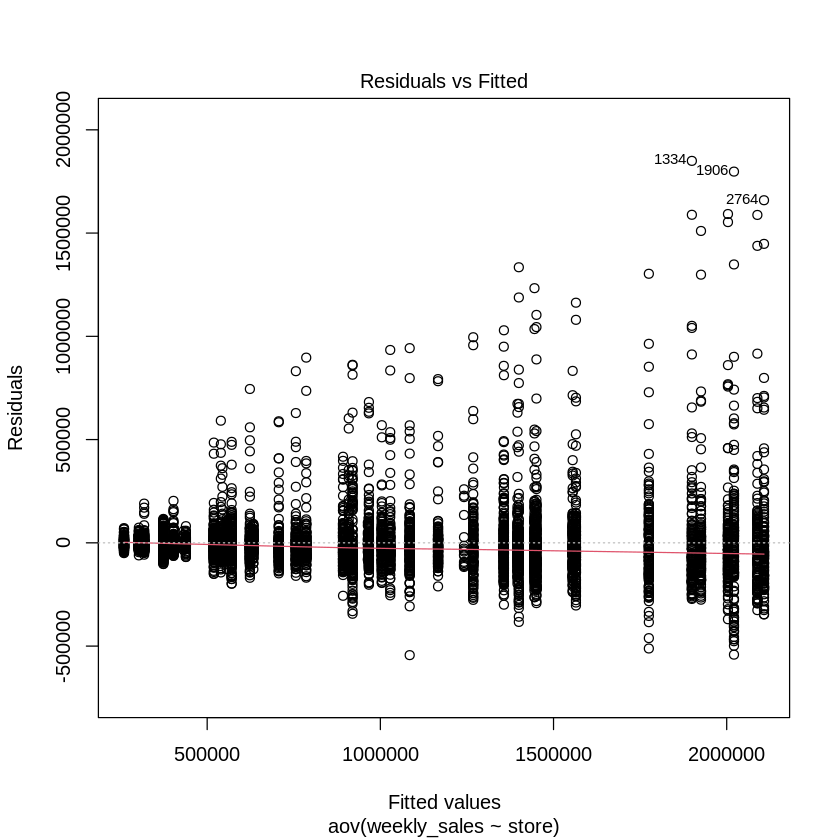

In [ ]:
#Residual vs Fitted values for constant variance
plot(anova_result,1)

In [ ]:
leveneTest(weekly_sales ~ store, data = walmart_data)

Df   F value  Pr(>F)       
group   44 17.76924 1.616619e-126
      5906       NA            NA

**Interpretation for Constant Variance:**  
Based on the Residual vs Fitted plot and the Levene test, we can tell whether the ANOVA test follows constant variance or not.

- The p-value in the test is below the significance level of 0.05. This implies that there is substantial evidence which indicates that the variation among the groups is statistically significant.

- We can concluded that the homogeneity of variances in the different store groups.

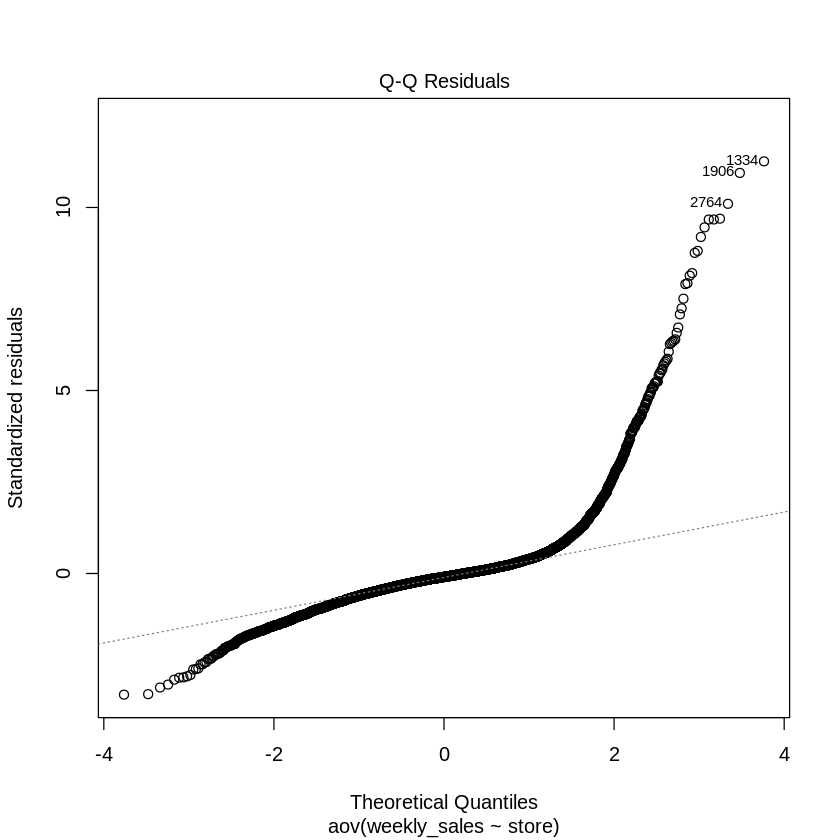

In [ ]:
plot(anova_result,2)

In [ ]:
shapiro_test = shapiro.test(sample(residuals(anova_result), 5000))
print(shapiro_test)


	Shapiro-Wilk normality test

data:  sample(residuals(anova_result), 5000)
W = 0.69415, p-value < 2.2e-16



**Interpretation for Normality Assumption:**
- Based on the Q-Q plot and Shapiro-Wilk test, we can determine whether the ANOVA result follows to normality or not.

- Null Hypothesis for assumption is the normality is not violating.
- Alternative Hypothess for the assumption is that normality is violating.

- Given the extremely small p-value, we can reject the null hypothesis and infer that there is statistical evidence indicating that the data is not normally distributed.

In [ ]:
kruskal.test(weekly_sales ~ store, data = walmart_data)


	Kruskal-Wallis rank sum test

data:  weekly_sales by store
Kruskal-Wallis chi-squared = 5690.2, df = 44, p-value < 2.2e-16


- Since the p-value < 0.05 from the kruska-wallis test we can conclude that there is a significant difference between the store groups.

### Feature Scaling

- The Walmart encoded dataset exhibits varying ranges among its features. To address this, we will normalise all the numerical features of the encoded data to a standardised scale ranging from 0 to 1.

- In order to conduct regression modelling on our dataset, it is necessary to perform feature scaling. This will allow for a more detailed understanding of the features.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


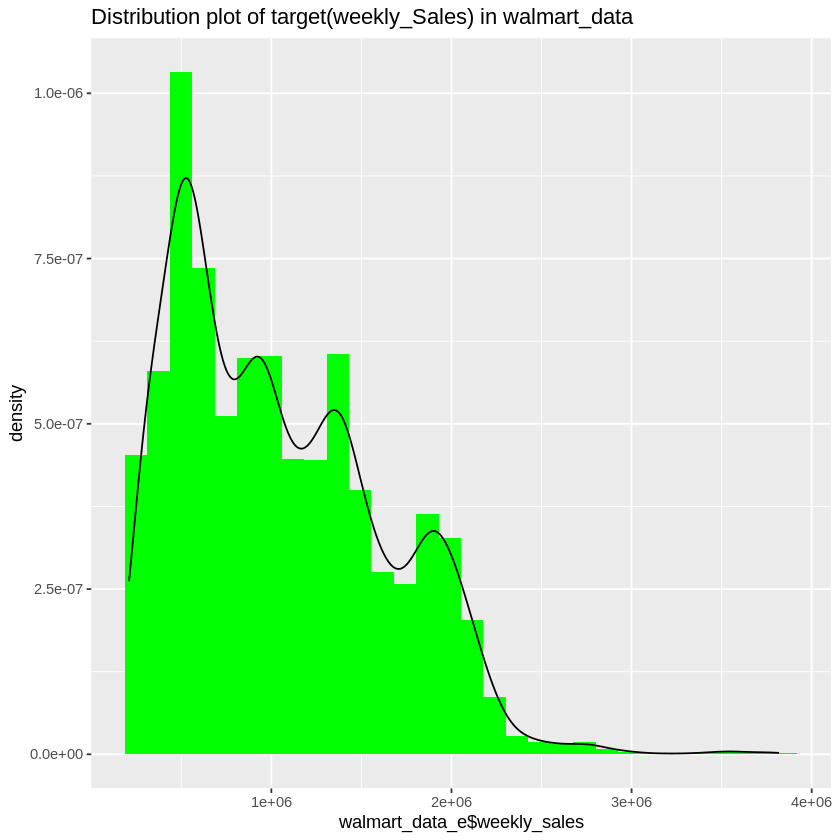

In [ ]:
# Distribution of weekly sales before feature scaling
ggplot()+
  geom_histogram(aes(x = walmart_data_e$weekly_sales, y = ..density..),fill = 'green',bins = 30)+
  geom_density(aes(x = walmart_data_e$weekly_sales))+
  ggtitle("Distribution plot of target(weekly_Sales) in walmart_data")

In [ ]:
print(num_features)

[1] "temperature"  "fuel_price"   "cpi"          "unemployment" "weekly_sales"


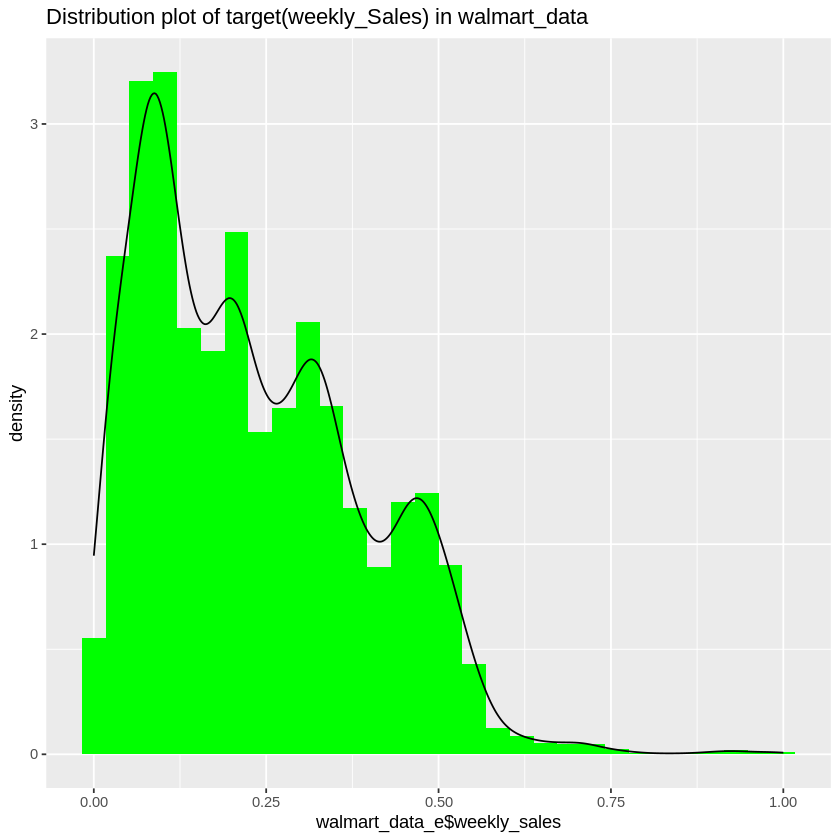

In [ ]:
# feature scaling the numerical features between [0,1].
feature_scaling = function(x) {
  fs = (x - min(x))/(max(x) - min(x))
  return(fs)
}

walmart_data_e[num_features] = lapply(walmart_data_e[num_features], feature_scaling)

# Distribution of weekly sales after feature scaling
ggplot()+
  geom_histogram(aes(x = walmart_data_e$weekly_sales, y = ..density..),fill = 'green',bins = 30)+
  geom_density(aes(x = walmart_data_e$weekly_sales))+
  ggtitle("Distribution plot of target(weekly_Sales) in walmart_data")

- Based on the distributions of response variable(weekly sales) before and after feature scaling, it is evident that there is no change in the distribution and shape, indicating that the original information has been preserved. The data does not adhere to a normal distribution and shows a positive right skew.

### Splitting the data into train and test

- In the below blocks we will randomly divide the encoded Walmart data into training and testing sets for our regression modelling statistical technique. Since there are no built-in functions available for splitting, we will perform the split manually.

In [ ]:
#randomly splitting the train and test from the encoded walmart data(below code from inclass notebook)
set.seed(123456)
n = floor(0.8 * nrow(walmart_data_e)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(walmart_data_e)), size = n) #randomly sample indicies to be included in the training set

train_walmart = walmart_data_e[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_walmart = walmart_data_e[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train_walmart)[1], "rows and",dim(train_walmart)[2],"columns in the training set. ")  #check the dimensions
cat("\nThere are", dim(test_walmart)[1], "rows and",dim(test_walmart)[2],"columns in the testing set.")  #check the dimensions

There are 4760 rows and 51 columns in the training set. 
There are 1191 rows and 51 columns in the testing set.

In [ ]:
head(train_walmart)

store2 store3 store4 store5 store6 store7 store8 store9 store10 store11 ⋯
3320 0      0      0      0      0      0      0      0      0       0       ⋯
234  1      0      0      0      0      0      0      0      0       0       ⋯
1084 0      0      0      0      0      0      1      0      0       0       ⋯
5122 0      0      0      0      0      0      0      0      0       0       ⋯
2430 0      0      0      0      0      0      0      0      0       0       ⋯
2935 0      0      0      0      0      0      0      0      0       0       ⋯
     store43 store44 store45 holiday_flagholiday_week date       temperature
3320 0       0       0       0                        2010-09-03 0.7127751  
234  0       0       0       0                        2011-10-28 0.6302331  
1084 0       0       0       0                        2011-09-02 0.8341606  
5122 0       0       0       0                        2012-04-27 0.6754424  
2430 0       0       0       0                        2012-10-19 0.4391454  
2935 0       0       0       0                        2011-07-08 0.8815278  
     fuel_price cpi        unemployment weekly_sales
3320 0.1943888  0.06583886 0.5755515    0.32044650  
234  0.4509018  0.90206839 0.4734059    0.43209741  
1084 0.5315631  0.92057053 0.3198852    0.18882170  
5122 0.7094188  0.93148720 0.4051073    0.02726842  
2430 0.6558116  0.05027209 0.1841946    0.20710243  
2935 0.5050100  0.87838957 0.5355092    0.14523599

In [ ]:
head(test_walmart)

store2 store3 store4 store5 store6 store7 store8 store9 store10 store11 ⋯
4  0      0      0      0      0      0      0      0      0       0       ⋯
7  0      0      0      0      0      0      0      0      0       0       ⋯
11 0      0      0      0      0      0      0      0      0       0       ⋯
14 0      0      0      0      0      0      0      0      0       0       ⋯
16 0      0      0      0      0      0      0      0      0       0       ⋯
17 0      0      0      0      0      0      0      0      0       0       ⋯
   store43 store44 store45 holiday_flagholiday_week date       temperature
4  0       0       0       0                        2010-02-26 0.4226370  
7  0       0       0       0                        2010-03-19 0.5084161  
11 0       0       0       0                        2010-04-16 0.6350885  
14 0       0       0       0                        2010-05-07 0.7023090  
16 0       0       0       0                        2010-05-21 0.7442814  
17 0       0       0       0                        2010-05-28 0.7874407  
   fuel_price cpi       unemployment weekly_sales
4  0.04458918 0.8427068 0.5738894    0.3324580   
7  0.12424850 0.8416788 0.5738894    0.3498571   
11 0.16833667 0.8344934 0.5288607    0.3480677   
14 0.18186373 0.8330233 0.5288607    0.3862800   
16 0.17735471 0.8357625 0.5288607    0.3296688   
17 0.14378758 0.8385268 0.5288607    0.3386493

### Statistical Technique 5: Regression Modeling

Objective: To determine the impact of factors such as store location, holiday weeks, temperature, fuel prices, CPI, and unemployment on weekly sales.

- Regression modelling can be used to determine the factors or features that influence weekly sales. This modelling technique provides p-values and parameter values, which indicate the impact of each factor on weekly sales.

- In the case of regression modelling, the response variable would be the weekly sales, while the remaining features are considered predictors. To undertand the dependencies from this model we will use the lm() function.

- We will use the train data for modelling purposes and the test data for predicting and evaluating the performance of our model on unseen data to assess its generalisation ability.

In [ ]:
#calculating mspe for model using test data
y_true_sales = test_walmart$weekly_sales
cal_mspe = function(model,test_data)
{
  y_pred_sales = predict(model,test_data)
  spe = (y_true_sales - y_pred_sales)^2
  mspe = mean(spe)
  return(mspe)
}

In [ ]:
#multiple Linear regression full model
f_model = lm(weekly_sales~.-date,data = train_walmart)
cat("FULL MODEL SUMMARY")
summary(f_model)

mspe_fm = cal_mspe(f_model,test_walmart)
cat("--------------MSPE of test data of full model: ",mspe_fm)

FULL MODEL SUMMARY


Call:
lm(formula = weekly_sales ~ . - date, data = train_walmart)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14435 -0.01871 -0.00343  0.01057  0.51594 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.355963   0.031876  11.167  < 2e-16 ***
store2                    0.099481   0.005563  17.884  < 2e-16 ***
store3                   -0.324251   0.005633 -57.558  < 2e-16 ***
store4                    0.187886   0.030396   6.181 6.89e-10 ***
store5                   -0.352420   0.005968 -59.055  < 2e-16 ***
store6                   -0.008329   0.005765  -1.445 0.148599    
store7                   -0.256685   0.008908 -28.815  < 2e-16 ***
store8                   -0.192300   0.005941 -32.368  < 2e-16 ***
store9                   -0.291761   0.005987 -48.732  < 2e-16 ***
store10                   0.158865   0.029006   5.477 4.55e-08 ***
store11                  -0.058466   0.005653 -10.343  < 2e-16 ***
store12   

--------------MSPE of test data of full model:  0.00280065

- In the provided detailed model results it is observed that certain p-values exceed the significance threshold of alpha (0.05). These p-values are not statistically significant in predicting the weekly sales, given that the date feature was not included.

- We eliminate the features with the highest p-values one at a time and evaluate the corresponding $R^2$, $adjR^2$, and MSPE values.

- If there are any substantial changes in those metrics after removal, we may choose not to remove that feature, even if the p-value is high.

- Based on the outcome, it is evident that store 24 has the highest p-value. To address this, we will utilise the update function to eliminate store 24 and examine the revised model.

**Feature Selection**:

- We are choosing the features/predictors from the full model based on their statistical significance at a significance level of $\alpha = 0.05$.The process involves selecting the features or predictors that have a p-value lower than alpha, indicating their significance in predicting the weekly sales.

In [ ]:
model1 = update(f_model,.~. -store24)
summary(model1)
cat("\n-------- MSPE after removing store24",cal_mspe(model1,test_walmart))


Call:
lm(formula = weekly_sales ~ store2 + store3 + store4 + store5 + 
    store6 + store7 + store8 + store9 + store10 + store11 + store12 + 
    store13 + store14 + store15 + store16 + store17 + store18 + 
    store19 + store20 + store21 + store22 + store23 + store25 + 
    store26 + store27 + store28 + store29 + store30 + store31 + 
    store32 + store33 + store34 + store35 + store36 + store37 + 
    store38 + store39 + store40 + store41 + store42 + store43 + 
    store44 + store45 + holiday_flagholiday_week + temperature + 
    fuel_price + cpi + unemployment, data = train_walmart)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14435 -0.01870 -0.00342  0.01060  0.51600 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.360971   0.008695  41.514  < 2e-16 ***
store2                    0.099367   0.005517  18.010  < 2e-16 ***
store3                   -0.324221   0.005630 -57.590  < 2e-16 ***
store4              


-------- MSPE after removing store24 0.00280063

- Based on the output provided, it is evident that removing the store24 feature did not result in any noticeable changes in the metrics $R^2$, $adjR^2$, and MSPE. Therefore, we will continue analysing the other features that have a p-value lower than the alpha value.

- From on the above result, we can observed that the store28 feature has the highest p-value compared to the significant alpha value. Therefore, it will be removed in the next step.

In [ ]:
model2 = update(model1,.~. -store28)
summary(model2)
cat("\n-------- MSPE after removing store28",cal_mspe(model2,test_walmart))


Call:
lm(formula = weekly_sales ~ store2 + store3 + store4 + store5 + 
    store6 + store7 + store8 + store9 + store10 + store11 + store12 + 
    store13 + store14 + store15 + store16 + store17 + store18 + 
    store19 + store20 + store21 + store22 + store23 + store25 + 
    store26 + store27 + store29 + store30 + store31 + store32 + 
    store33 + store34 + store35 + store36 + store37 + store38 + 
    store39 + store40 + store41 + store42 + store43 + store44 + 
    store45 + holiday_flagholiday_week + temperature + fuel_price + 
    cpi + unemployment, data = train_walmart)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14437 -0.01867 -0.00342  0.01060  0.51599 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.360897   0.008668  41.634  < 2e-16 ***
store2                    0.099363   0.005517  18.011  < 2e-16 ***
store3                   -0.324203   0.005627 -57.616  < 2e-16 ***
store4                    0.18


-------- MSPE after removing store28 0.002800619

- Even though the removal of store28, there is no substantial change in the values of $R^2$, $adjR^2$, and MSPE. Therefore, we will continue with the same procedure, but this time we will exclude the column of store23 that has the highest p-value.

In [ ]:
model3 = update(model2,.~. -store23)
summary(model3)
cat("\n-------- MSPE after removing store23",cal_mspe(model3,test_walmart))


Call:
lm(formula = weekly_sales ~ store2 + store3 + store4 + store5 + 
    store6 + store7 + store8 + store9 + store10 + store11 + store12 + 
    store13 + store14 + store15 + store16 + store17 + store18 + 
    store19 + store20 + store21 + store22 + store25 + store26 + 
    store27 + store29 + store30 + store31 + store32 + store33 + 
    store34 + store35 + store36 + store37 + store38 + store39 + 
    store40 + store41 + store42 + store43 + store44 + store45 + 
    holiday_flagholiday_week + temperature + fuel_price + cpi + 
    unemployment, data = train_walmart)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14474 -0.01862 -0.00323  0.01047  0.51551 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.351558   0.005296  66.388  < 2e-16 ***
store2                    0.099193   0.005516  17.983  < 2e-16 ***
store3                   -0.323984   0.005625 -57.596  < 2e-16 ***
store4                    0.189343   0.0


-------- MSPE after removing store23 0.002806772

- After removing store23, there were no significant changes in the metrics $R^2$, $adjR^2$, and MSPE. Therefore, we will continue with the process of removing columns with the highest p-value, which is store6.

In [ ]:
model4 = update(model3,.~. -store6)
summary(model4)
cat("\n-------- MSPE after removing store6",cal_mspe(model4,test_walmart))


Call:
lm(formula = weekly_sales ~ store2 + store3 + store4 + store5 + 
    store7 + store8 + store9 + store10 + store11 + store12 + 
    store13 + store14 + store15 + store16 + store17 + store18 + 
    store19 + store20 + store21 + store22 + store25 + store26 + 
    store27 + store29 + store30 + store31 + store32 + store33 + 
    store34 + store35 + store36 + store37 + store38 + store39 + 
    store40 + store41 + store42 + store43 + store44 + store45 + 
    holiday_flagholiday_week + temperature + fuel_price + cpi + 
    unemployment, data = train_walmart)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14481 -0.01869 -0.00332  0.01050  0.51544 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.350998   0.005279  66.495  < 2e-16 ***
store2                    0.102680   0.004828  21.267  < 2e-16 ***
store3                   -0.320253   0.004847 -66.073  < 2e-16 ***
store4                    0.189449   0.005495  34


-------- MSPE after removing store6 0.002804798

- After removing the store6 column, there is no change in the coefficients of determination ($R^2$), adjusted coefficients of determination ($adjR^2$), and mean squared prediction error (MSPE). Additionally, there are no variables with the highest p-value in the model.This model can be considered the most optimal based on the alpha value approach.

- The features store24, store28, store23, and store6 have not siginificant to predict the weekly sales.

**Interpretation of Regression model results:**

- The regression modelling results indicate that each feature has a distinct coefficient. The value of each feature/predictor informs us about the magnitude of the change in weekly sales when there is a one-unit change in the predictors.

- First,lets see the locations of the stores. Each store has distinct values, with some being positive and others being negative. The positive values indicate that these stores perform better than the baseline store (store1), while the negative values indicate that these stores perform worse than the baseline store.

- The presence of a positive value for the holidayflag (0.0206) suggests that, on average, all stores experience a sales increase during the holidays. Additionally, we can determine the precise impact of holidays on individual stores by using the interaction terms between stores and the holidayflag.

- The negative values for temperature (-0.016), fuel price (-0.019), and unemployment (-0.03) indicate that an increase in these factors leads to a decrease in weekly sales. And that the CPI (0.06) has a positive value, indicating that an increase in the CPI value leads to a decrease in the weekly sales.

- Additionally,the higher values of $R^2$ (0.9257) and $adjR^2$ (0.925), which indicates the model's ability to capture a significant amount of variance and thus shows a strong fit.

- By utilising the model, we are able to forecast the weekly sales using unseen data, specifically the test data. This yields a mspe value of 0.0028, indicating that our model is effectively predicting to the unseen data.

### Statistical Technique 6: Diagnostics plots

Objective: Using diagnostic plots to evaluate the assumptions of the regression model built to predict weekly sales at Walmart, and to identify any anomalies that might affect the model's accuracy.

**Goodness of Fit:**

- The goodness of fit for a model can be assessed by the $R^2$ and $adjR^2$ values of the model. The given model has $R^2$ and $adjR^2$ values of 0.925 and 0.925, respectively. This indicates that the model accounts for approximately 92.5% of the variation in weekly sales among various Walmart store locations.

**Feature Selection:**

- In the regression modelling, we conducted feature selection using an alpha value. We chose the features that are most significant for predicting weekly sales. which includes all features except store6, store23, store24, and store28.

- The four features mentioned above have p-values that are higher than the significance value alpha (0.05), therefore we have excluded them. After eliminating those features, we obtained the optimal model which accounts for 92.5% of the variability in weekly sales.


**Residual Analysis:**

- As we develop a multiple linear regression (MLR) model, we need to ensure that our final model follows to the assumptions of MLR. To do this, we will perform residual analysis, which involves checking the normality, linearity, constant variance, and independence of the residuals, using diagnostic plots.

- We will be using the
  - Observed vs Fitted plot for Linearity assumption
  - Residual vs Fitted plot for Constant variance
  - Q-Q plot for normality
  - Residual vs index plot for independence

In [ ]:
#extracting the fitted, residuals of the models
y_train_sales_predict = fitted(model4)
residuals = resid(model4)
y_true_sales = train_walmart$weekly_sales

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


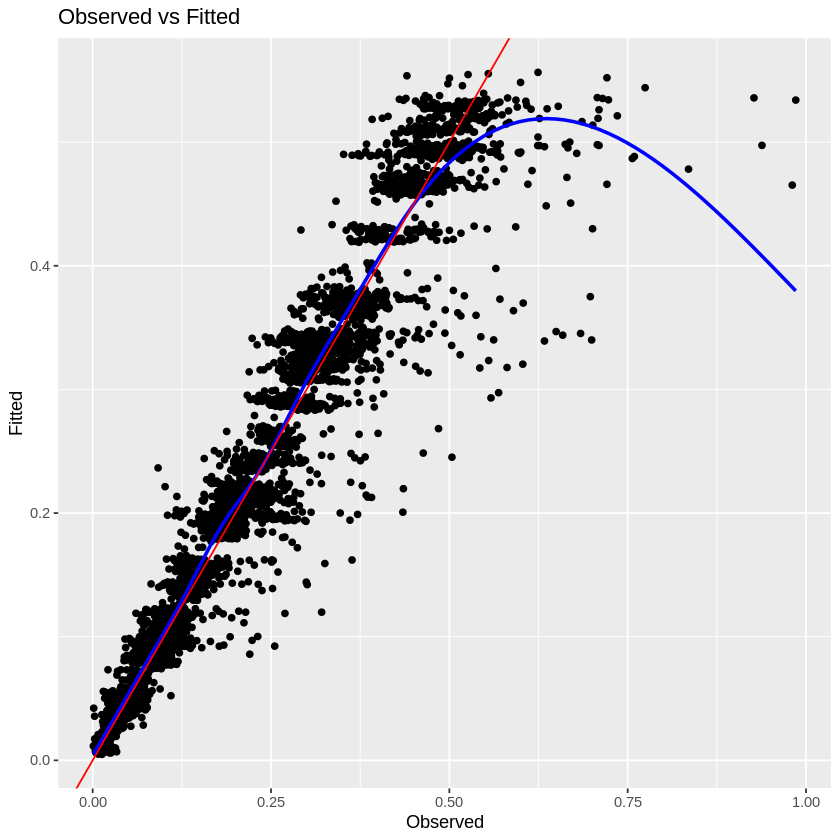

In [ ]:
#observed vs fitted plot
ggplot()+
  geom_point(aes(x = y_true_sales,y = y_train_sales_predict))+
  geom_smooth(aes(x = y_true_sales,y = y_train_sales_predict),se = F,color = 'blue')+
  geom_abline(intercept = 0,slope=1,color='red')+
  ggtitle("Observed vs Fitted")+
  xlab("Observed")+
  ylab("Fitted")


- The `Observed vs Fitted` plot can be used to assess the linearity assumption of our model. In the plot above, the blue curve represents the trend, while the red line represents the ideal situation. The blue curve diverges from the red line, which indicates less accuracy at the extremes. Our model exhibits linearity in the middle range, but deviates from accuracy at low and high values, which tells the need for a non-linear model.
In order to enhance the performance, we need to transform the target variable.

- The model follows to the assumption of `linearity` within the middle range, but deviates from it at the extremes.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


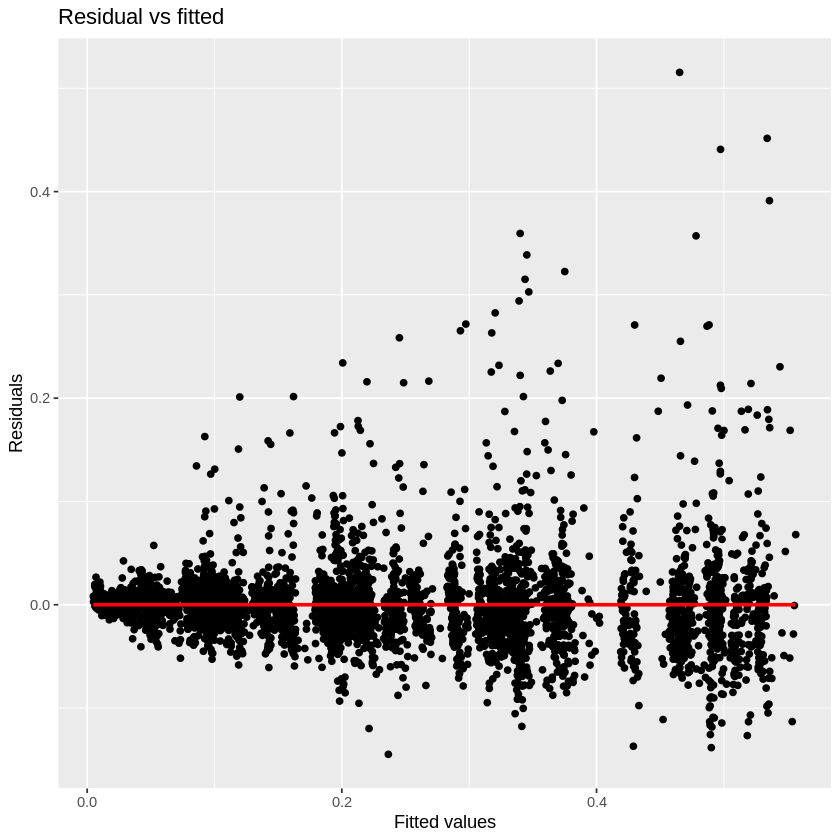

In [ ]:
#Residual vs fitted
ggplot()+
  geom_point(aes(x= y_train_sales_predict,y=residuals))+
  geom_smooth(aes(x= y_train_sales_predict,y=residuals),se=F,color='red')+
  ggtitle("Residual vs fitted")+
  xlab("Fitted values")+
  ylab("Residuals")

- The `Residual vs Fitted plot` is used to assess the assumption of constant variance (homoscedasticity) in our multiple linear regression (MLR) model. If a model follows to the constant variance assumption, the data points will be observed as randomly distributed around the horizontal axis, without having any discernible patterns.

- The plots above indicate a pattern in which the residuals become more spread out as the fitted values increase. This suggests that the variance of the residuals is not constant.

- The model `fails` to follow to the assumption of `constant variance`.

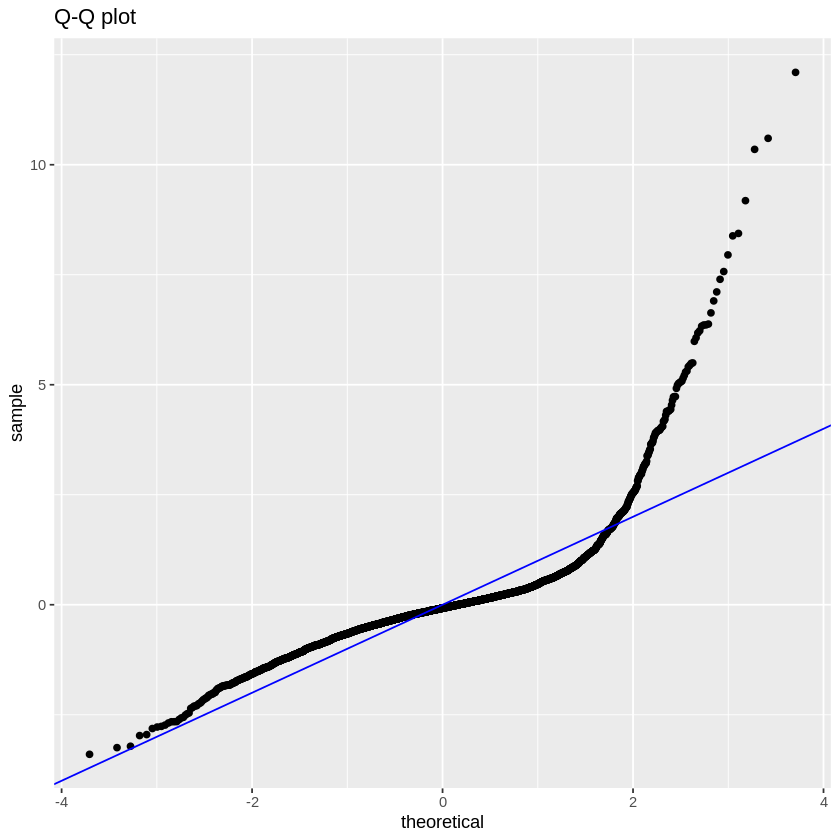

In [ ]:
#Q-Q plot
s = (residuals - mean(residuals))/sd(residuals)
ggplot()+
  stat_qq(aes(sample = s))+
  geom_abline(slope = 1, intercept = 0, col = "blue")+
  ggtitle("Q-Q plot")

- The `Q-Q plot` allows us to determine whether our model follows to the assumption of normality. If the residuals, which are the data points in the plot, are perfectly aligned with the blue 45-degree straight line, we can conclude that the multiple linear regression (MLR) model is not violating the assumption of normality.

- The plot above shows that the data points (residuals) are not following a straight line, which suggests that the multiple linear regression (MLR) model is not meeting the assumption of normality.

- The models Violates(not follows) the `Normality` assumption.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


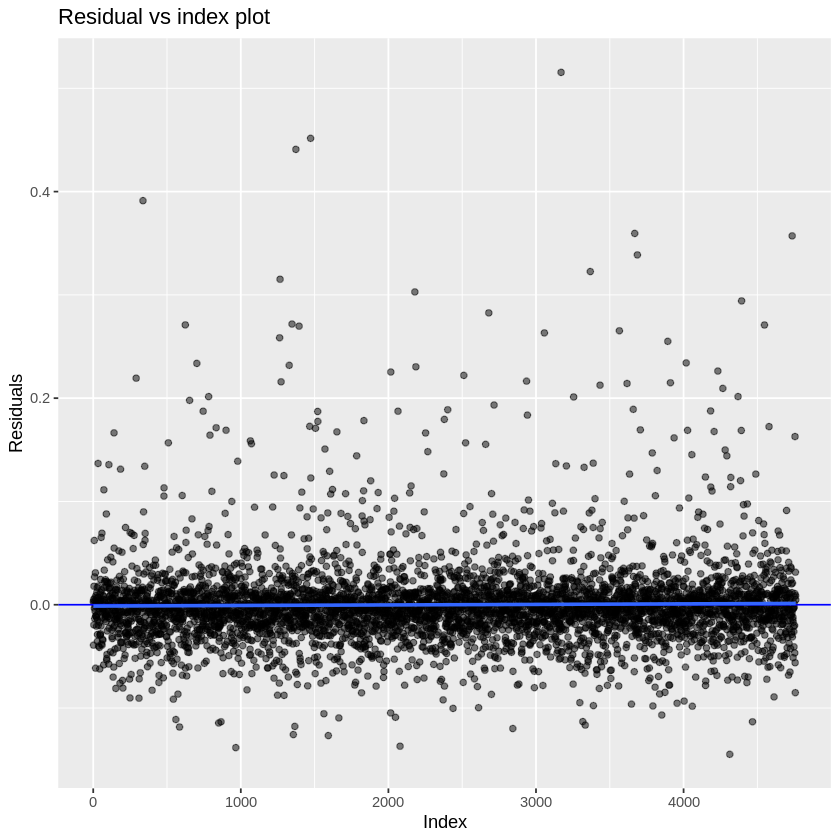

In [ ]:
#plotting residual vs index for independence as well.
x = 1:length(y_true_sales)
ggplot() +
    geom_point(aes(x = x, y = residuals),alpha = 0.5) +
    geom_abline(slope = 0, intercept = 0,color='blue')+
    xlab("Index") +
    geom_smooth(aes(x = x, y = residuals),se = F) +
    ylab("Residuals") +
    ggtitle("Residual vs index plot")

- The independence assumption of our model is satisfied when the residuals exhibit a random distribution around zero, as observed from the Residual vs Index plot.If the errors are distributed randomly, there will be no correlation between them.

- The above plot of the MLR model indicates that the residuals are distributed randomly around zero. Therefore, we can confirm that our model follows to the independent assumption.

- The model follows the `Independence` assumption.

- In conclusion, the model we developed with Multiple Linear Regression (MLR) in regression modelling follows to the following assumptions.
  - May Violates Linearity Assumption
  - Violates Normality Assumption
  - Violates Constant Variance Assumption
  - Follows Independence Assumption.

### Statistical Technique 7: Model Selection - AIC, BIC, MSPE, AdjR2
Objective: To compare different regression models and select the one that provides the best predictive accuracy.

- The regression model we build is based on the alpha value that is statistically significant. We eliminated features with p-values greater than the alpha value.

- However, using the `regsubsets()` function in R, we can obtain the optimal combination of features for each size, ranging from size 1 to the total number of predictors, based on the model selection statistic. The optimal model selection for each size is determined using the Sum of Squared Errors (SSE) metric in the function. Additionally, the selection method employed can be either backward selection, forward selection, or exhaustive selection of features. The function object provides a table that displays logical values (true or false) for each feature, indicating whether the feature is included or not.

In [ ]:
colnames(train_walmart)[-51]
length(colnames(train_walmart))

[1] "store2"                   "store3"                  
 [3] "store4"                   "store5"                  
 [5] "store6"                   "store7"                  
 [7] "store8"                   "store9"                  
 [9] "store10"                  "store11"                 
[11] "store12"                  "store13"                 
[13] "store14"                  "store15"                 
[15] "store16"                  "store17"                 
[17] "store18"                  "store19"                 
[19] "store20"                  "store21"                 
[21] "store22"                  "store23"                 
[23] "store24"                  "store25"                 
[25] "store26"                  "store27"                 
[27] "store28"                  "store29"                 
[29] "store30"                  "store31"                 
[31] "store32"                  "store33"                 
[33] "store34"                  "store35"                 
[35] "store36"                  "store37"                 
[37] "store38"                  "store39"                 
[39] "store40"                  "store41"                 
[41] "store42"                  "store43"                 
[43] "store44"                  "store45"                 
[45] "holiday_flagholiday_week" "date"                    
[47] "temperature"              "fuel_price"              
[49] "cpi"                      "unemployment"

[1] 51

- We have opted to utilise the "backward selection method" to determine the most optimal features for each size. Upon analysing the regsubsets() object, we found that it provides the bic and adjR2 values for each model.

In [ ]:
n_feature = length(colnames(train_walmart)) - 1
models = regsubsets(weekly_sales~.-date,method = "backward", data = train_walmart,nvmax = n_feature)
summary_models = summary(models)

In [ ]:
summary_df = summary_models$which
summary_df

(Intercept) store2 store3 store4 store5 store6 store7 store8 store9 store10
1  TRUE        FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
2  TRUE        FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
3  TRUE        FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
4  TRUE        FALSE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
5  TRUE         TRUE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  
6  TRUE         TRUE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  
7  TRUE         TRUE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  
8  TRUE         TRUE  FALSE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE  
9  TRUE         TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
10 TRUE         TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
11 TRUE         TRUE  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
12 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
13 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
14 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
15 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
16 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE   TRUE  
17 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE   TRUE   TRUE  
18 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE   TRUE   TRUE  
19 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
20 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
21 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
22 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
23 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
24 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
25 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE  FALSE   TRUE   TRUE  
26 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
27 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
28 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
29 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
30 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
31 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
32 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
33 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
34 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
35 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
36 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
37 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
38 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
39 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
40 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
41 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
42 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
43 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
44 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
45 TRUE         TRUE   TRUE   TRUE   TRUE  FALSE   TRUE   TRUE   TRUE   TRUE  
46 TRUE         TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
47 TRUE         TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
48 TRUE         TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
49 TRUE         TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE   TRUE  
   ⋯ store41 store42 store43 store44 store45 holiday_

In [ ]:
#finding out the best model based on bic, adjr2 and r2criteria
best_bic_model = which.min(summary_models$bic)
cat("The model which is best according to BIC:",best_bic_model)
best_adjr2_model = which.max(summary_models$adjr2)
cat("\nThe model which is best according to AdjR2:",best_adjr2_model)
best_r2_model = which.max(summary_models$rsq)
cat("\nThe model which is best according to R2:",best_r2_model)

The model which is best according to BIC: 45
The model which is best according to AdjR2: 47
The model which is best according to R2: 49

The model which is best according to AIC: 45

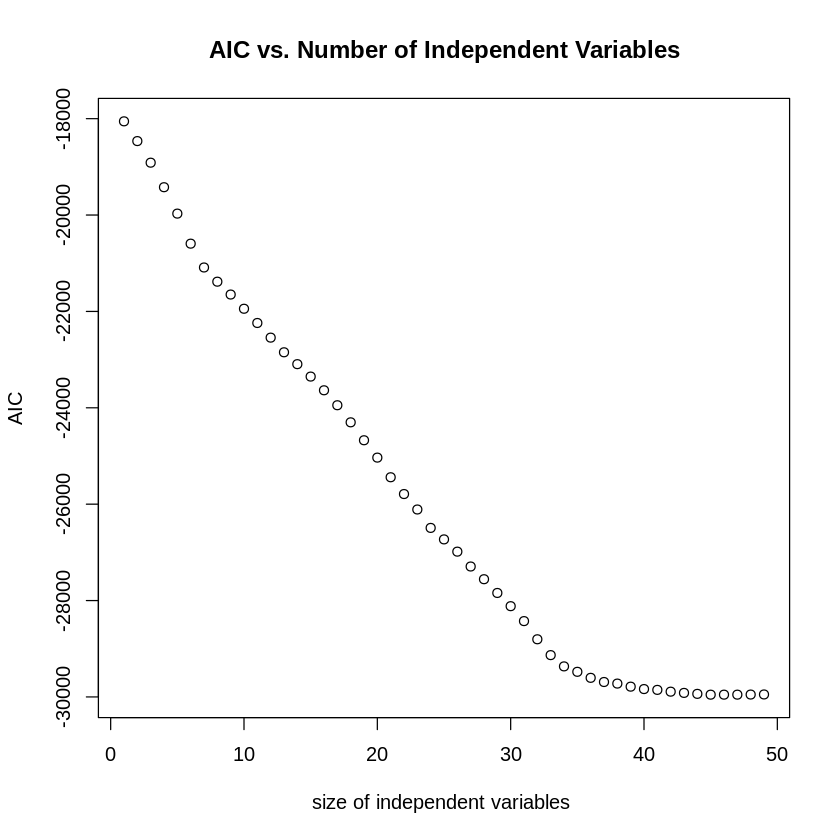

In [ ]:
#selecting the best model based on aic criteria
n = nrow(train_walmart)
AIC = 2*(2:50) + n*log(summary_models$rss/n)
plot(AIC ~ I(1:49), xlab = "size of independent variables ", ylab = "AIC",main = "AIC vs. Number of Independent Variables")
best_aic_model = which.min(AIC)
cat("The model which is best according to AIC:",best_aic_model)

In [ ]:
cat("Best features selected by the AIC:",colnames(summary_df)[summary_df[best_aic_model,]][-1])
cat("\nBest features selected by the BIC:",colnames(summary_df)[summary_df[best_bic_model,]][-1])
cat("\nBest features selected by the ADJR2:",colnames(summary_df)[summary_df[best_adjr2_model,]][-1])
cat("\nBest features selected by the R2:",colnames(summary_df)[summary_df[best_r2_model,]][-1])

Best features selected by the AIC: store2 store3 store4 store5 store7 store8 store9 store10 store11 store12 store13 store14 store15 store16 store17 store18 store19 store20 store21 store22 store25 store26 store27 store29 store30 store31 store32 store33 store34 store35 store36 store37 store38 store39 store40 store41 store42 store43 store44 store45 holiday_flagholiday_week temperature fuel_price cpi unemployment
Best features selected by the BIC: store2 store3 store4 store5 store7 store8 store9 store10 store11 store12 store13 store14 store15 store16 store17 store18 store19 store20 store21 store22 store25 store26 store27 store29 store30 store31 store32 store33 store34 store35 store36 store37 store38 store39 store40 store41 store42 store43 store44 store45 holiday_flagholiday_week temperature fuel_price cpi unemployment
Best features selected by the ADJR2: store2 store3 store4 store5 store6 store7 store8 store9 store10 store11 store12 store13 store14 store15 store16 store17 store18 store19 s

In [ ]:
#selecting the best model out of 49 models based on the MSPE value
y_true = test_walmart$weekly_sales
mspes  = c()
for(i in 1:49)
{
  features = colnames(summary_df)[summary_df[i,]][-1]
  model = as.formula(paste("weekly_sales ~",paste(features,collapse = "+")))
  model = lm(model,data =train_walmart)
  y_pred = predict(model,test_walmart)
  spe = (y_true - y_pred)^2
  mspe = mean(spe)
  mspes = c(mspes,mspe)
}
cat("MSPE values of all models for each size:",mspes)

MSPE values of all models for each size: 0.02515914 0.02322037 0.02083639 0.01846343 0.01676143 0.01509006 0.01293913 0.01228852 0.01166537 0.01077802 0.01030197 0.009858429 0.009448515 0.009109986 0.008788179 0.008190549 0.007686641 0.00722546 0.006662553 0.006175906 0.005650391 0.005205573 0.005009935 0.004551413 0.004367654 0.004170968 0.004021551 0.003855346 0.003761991 0.003594804 0.003459233 0.003297636 0.003145998 0.003059344 0.003030584 0.003003628 0.002986306 0.002956919 0.002919502 0.002889666 0.002882825 0.002858084 0.002849378 0.002827249 0.002804798 0.002806772 0.002800619 0.00280063 0.00280065

In [ ]:
best_mspe = which.min(mspes)
cat("Best model size using MSPE is:",best_mspe , "with MSPE:", mspes[best_mspe], "\n")
cat("Best features selected by the MSPE:",colnames(summary_df)[summary_df[best_mspe,]][-1])

Best model size using MSPE is: 47 with MSPE: 0.002800619 
Best features selected by the MSPE: store2 store3 store4 store5 store6 store7 store8 store9 store10 store11 store12 store13 store14 store15 store16 store17 store18 store19 store20 store21 store22 store23 store25 store26 store27 store29 store30 store31 store32 store33 store34 store35 store36 store37 store38 store39 store40 store41 store42 store43 store44 store45 holiday_flagholiday_week temperature fuel_price cpi unemployment

**Interpretation of Model selection results :**

- The results above indicate that various models selected different techniques.

- According to the Bayesian Information Criterion (BIC) technique, the optimal model would consist of `45` features, including all features except store6, store23, store24, and store28.

- According to the adjusted R-squared $(adjR^2)$, which is a statistical measure that considers the number of predictors in a model to give a more precise evaluation of model complexity, the optimal model would include `47 `features, excluding store24 and store28.

- The Akaike Information Criterion (AIC) is a method used to select a model that minimises information loss and prioritises the identification of a reliable predictive model. The optimal model, as determined by this technique, includes `45` features. This model includes all features except for store6, store23, store24, and store28.

- The optimal model, determined by the Mean Square Error (MSPE), includes `47` features, excluding store24 and store28.

- The optimal model, determined by the $R^2$, includes `49` features, it includes all features.

- The model selection techniques (AIC, BIC, AdjR2, MSPE) have not included the features of store6, store23, store24, and store28 into the optimal models. From these findings, it can be concluded that store6, store23, store24, and store28 possess minimal significance in predicting the weekly sales.

### Statistical Technique 8: Generalised Linear Modeling(GLM)
Objective: To determine whether a generalized linear model could provide a better fit for the Walmart dataset considering the distribution of weekly sales.

- The distribution of the weekly sales response variable plot indicates that it deviates from a normal distribution.The distribution exhibits a right-skewed pattern which is frequently observed in sales data due to the presence of a few weeks with exceptionally high sales and a majority of weeks with moderate sales.

- In contrast to linear regression, which assumes a linear relationship between the variables, the generalised linear model provides greater flexibility in representing non-linear relationships and handling response variables that are not normally distributed.

- We are going to use the Gamma distribution as our dependent variable is continuous, right-skewed, and has positive values. We will employ a square root link function using Generalised Linear Models (GLM).

In [ ]:
#function to calculate the MSPE
y_true_sales = test_walmart$weekly_sales
cal_mspe = function(model,test_data)
{
  y_pred_sales = predict(model,test_data)
  spe = (y_true_sales - y_pred_sales)^2
  mspe = mean(spe)
  return(mspe)
}

In [ ]:
#using glm model from ass library and sqrt link function with gamma distrubtion on resonse variable
glm_model = glm(weekly_sales ~ . -date, family = Gamma(link = "sqrt"), data = train_walmart)
summary(glm_model)


Call:
glm(formula = weekly_sales ~ . - date, family = Gamma(link = "sqrt"), 
    data = train_walmart)

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.598505   0.025122  23.824  < 2e-16 ***
store2                    0.076339   0.008750   8.724  < 2e-16 ***
store3                   -0.382242   0.006271 -60.958  < 2e-16 ***
store4                    0.133574   0.025036   5.335 9.99e-08 ***
store5                   -0.442054   0.006213 -71.151  < 2e-16 ***
store6                   -0.003705   0.008318  -0.445 0.656023    
store7                   -0.287599   0.008624 -33.350  < 2e-16 ***
store8                   -0.176133   0.007327 -24.040  < 2e-16 ***
store9                   -0.310168   0.006700 -46.292  < 2e-16 ***
store10                   0.107690   0.024058   4.476 7.78e-06 ***
store11                  -0.048024   0.007964  -6.030 1.77e-09 ***
store12                  -0.105925   0.025300  -4.187 2.88e-05 ***
store13   

In [ ]:
cat("MSPE of GLM model is",cal_mspe(glm_model,test_walmart))

MSPE of GLM model is 0.05043822

**Interpretation of the results of GLM:**
- We have used the square root link function which involves applying a transformation to the expected value of the response variable.

- The results of the Generalised Linear Model (GLM) indicate that most of the store variables have a significant impact on weekly sales, as we can see the coefficients.

- Additionally, the Holidayflag has a positive value that holds significance to weekly sales, similar to the Multiple Linear Regression (MLR) model.

- The variables temperature and fuel prices, which have negative coefficients, have a lower level of significance on the weekly sales.

- The CPI, with a p-value higher than the significant alpha value of 0.05, may not have a measurable impact on sales.

- In addition to the CPI, there are other features with p-values greater than 0.05 that do not have an impact on sales. We can eliminate them as we did in MLR.

- The Null deviance and Residual deviance provide information about the goodness of fit of the model. A model that fits the data well will have a residual deviance that is close to the null deviance. In our case, there is a significant decrease from null to residual deviance, indicating a strong fit.

- The Akaike Information Criterion (AIC) is a metric that quantifies the model's quality. Typically, lower values are more preferable.

- The MLR model has a significantly lower MSPE value compared to the GLM model, suggesting that the MLR model has better predictive accuracy in terms of MSPE.

- Furthermore, it is evident that our MLR model doesn't follow to the normality assumption. Despite having a lower mean squared prediction error (MSPE), the GLM model is still the optimal choice, even with a higher MSPE of 0.05, as it does not make the assumption of normality for residuals.

# Report

## **Introduction**



I'm interested in analysing Walmart sales data because it allows us to see broader economic trends and consumer behaviours. This information is not only critical for understanding market dynamics, but it also serves as an indicator of the overall health of the retail sector, making it necessary for accurate economic forecasting and analysis. This type of research helps to close broadening our understanding of economic patterns.


Walmart's revenues share a lot of useful information that goes beyond just transactions. For example, they show how changes in the economy or weather affect people's spending. These numbers are useful for making business decisions, improving marketing strategies, and planning finances.


Retail analytics research has consistently identified a variety of factors that influence sales, such as holidays influencing shopping behaviours, economic downturns correlated with less consumer spending, and location analytics showing how geographical factors can influence store performance due to differences in demographics and competition levels. Existing research allows us to better understand these factors.


For the analysis, I gathered the Walmart data from Kaggle, a platform hosting datasets for research and analytical competitions. The data was gathered through an observational study without manipulating variables for research purposes.


**Problem Statement**  
The primary objective of this analysis is to determine and measure the factors that substantially impact weekly sales at Walmart stores, including seasonal variations, holidays, and economic circumstances that may impact consumer expenditure. In this project Iaim to determine the impact of each variable on sales fluctuations and assess their potential for predicting future sales patterns. Others, include the precise impact of specific holidays on sales, the influence of economic indicators on consumer behavior, such as the CPI and fuel prices, and variations in sales between Walmart store locations.

## **Methods/Results**

### **Data Obtained:**  
I have obtained the Walmart sales data for the project from Kaggle, a well-known platform known for hosting different datasets used in research and machine learning competitions. The information wasn't gathered through web scraping or experimental design; instead, Walmart got it from a secondary source by observing how the business worked.

**Dataset Link**: https://www.kaggle.com/datasets/yasserh/walmart-dataset

- I have used different data cleaning methods, such as eliminating of null values and duplicate entries and detecting and handling dataset outliers. Some of the data in Walmart's database is of different types, like dates, stores, and holiday flags, converted them to suitable types. And also perfomed data transformation techniques to make data amenable to analysis.

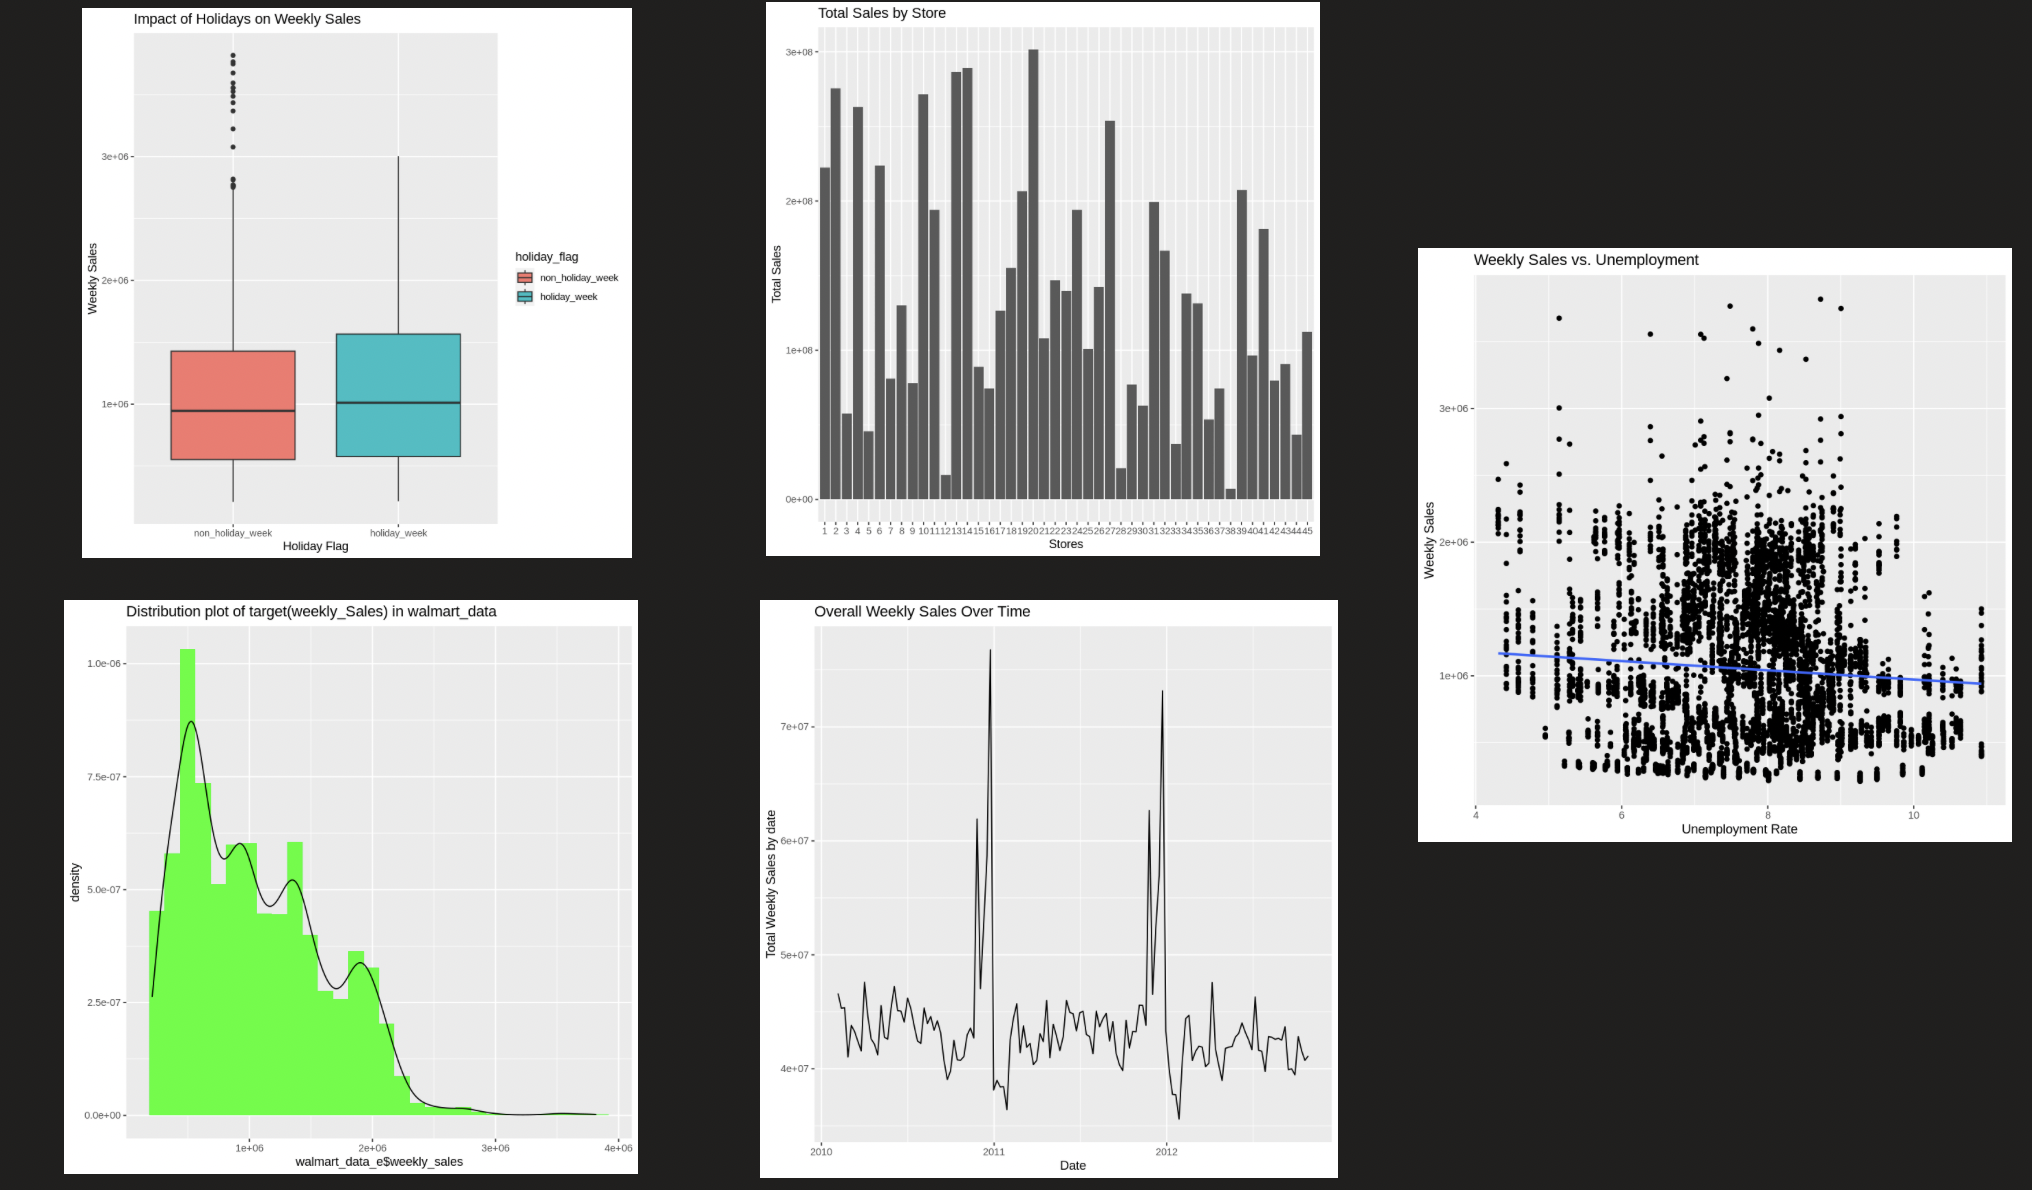

### **Exploratory data anaylsis:**  

Through the above exploratory analysis of Walmart's sales data, I have found important results that are related to the main problem question about the factors that affect weekly sales. According to our results, seasonal patterns and promotional activities have a big effect on changes in sales. This is shown by the fact that sales go up a lot during certain weeks usually around major holidays. Also looking at sales data from different Walmart stores shows big differences. This means that things that are unique to each store like its location, size, and the people who live in the area have a big effect on how well it does. The boxplot analysis shows that sales consistently go up around holidays with fewer extreme values. This provides further proof that holidays do have an effect. This means that sales will be more stable during the holidays. I also looked at the relationship between unemployment rates and sales and found a possible although weak inverse correlation. This suggests that economic factors also play a role though not as much as store-specific or seasonal factors. The pattern of weekly sales is right-skewed from the plot which means that some weeks will have surprisingly high sales. This shows how important it is to have forecasting models that can deal with these kinds of anomalies.

### **Appropriate anaylsis to answer question of interest:**  

- I used a several statistical techniques to analyse the factors that significantly impact Walmart's weekly sales:
  - I began the process with hypothesis testing to determine the statistical significance of sales spikes during holidays.
  - Confidence intervals help us to estimate the range of potential sales fluctuations during these periods of great demand.
  - Using regression modelling, will analyse the impact of factors such as store characteristics, economic indicators, and seasonal variations on sales figures. Model diagnostics can be helpful to verify the robustness and reliability of models.
  - In used  to analyse the variation in sales among different Walmart locations and between holday period and regural periods , I use F-tests and ANOVA.
  - In order to enhance our ability to make accurate predictions, I utilise model selection techniques such as AIC and BIC to identify the most statistically robust model. This ensures that I could accurately capture the complex nature of the sales data without overfitting.
  - Finally, I will perform a Generalised Linear Modelling analysis by considering the sales data distribution. This approach allow us to effectively handle the non-normal distribution of sales data, which is common in retail analytics.
-  Each of these methods is more than just a statistical exercise; they are all useful for figuring out what makes Walmart's sales go up or down. These insights can help with making strategic decision.

### **Describing the analyses used and Interpretations**

#### **Hypothesis testing**

- For the hypothesis testing , I used welch two sample t-test , to determine the impact of holiday periods on sales at Walmart. In which I compare means of weekly sales of each during holidays and non-holidays periods.
- The test results showed a t-value of 2.5678 and a p-value of 0.01054, which indicates the statistical significance and leads to reject the null hypothesis. This indicates a significant difference in sales, with holiday weeks exhibiting higher mean sales than non-holiday weeks.

#### **Confidence Interval**

- Using a confidence interval technique to estimate sales during major holiday seasons (such as the Super Bowl, Labor Day, Thanksgiving and Christmas) and compare them to sales on regular days. In which I am collecting weekly sales data for the holidays and using a t-test to calculate average sales and corresponding 95% confidence intervals.
- From the results we can see Thanksgiving consistently has the highest sales, indicating peak consumer spending.Christmas sales are much lower but still higher than regular sales days. Super Bowl and Labour Day increases sales but not as much as Thanksgiving. Looking at the range and average sales values for each holiday can help figure out how important each one is for getting people to spend money. With confidence intervals calculated for major holidays, the average sales value was much higher than during non-holiday times. This shows how important these events are as times when sales should go up.

#### **F- test**

- I used the F-test to compare sales variability between holidays and non-holiday weeks.To Calculate this variability I have used `var.test()` function. From the results its is evident that a significant difference between those two period having evidence with a p-value(0.001027) which is lower than the standard alpha level of 0.05. Holiday sales showed greater variability compared to non-holiday periods, possibly due to increased promotional activities.



#### **ANOVA**

- I used Analysis of Variance (ANOVA) to check sales variations in different Walmart stores.And calculated the variance between these groups using `aov()` function. Performed several test like  the Levene's test revealed significant variance discrepancies among the groups, indicating a violation of the assumption of equal variances. The Shapiro-Wilk test on the residual sample indicated that the data did not follow a normal distribution, which is common in real-world data particularly in sales data that frequently includes outliers and skewness.
- Even though the assumptions are violating it beneficial to perform anyalsis due to its robustness to violations of normality and ability to provide valuable insights into the effects of categorical variables on sales.
- The ANOVA results indicated a significant difference in weekly sales at least one Walmart store with evidence of p-value(F-value: 1496, p-value: less than 2e-16), highlighting the impact of location and operations on sales.

#### **Regression Modeling**

- Walmart's weekly sales are influenced by factors like store location, holidays, weather, fuel prices, the CPI, and unemployment rates. I used multiple regression model to measure these variables and predict sales changes for each unit increase in each predictor.The next statistical analysis method will explain the assumptions for this model and the respective diagnostics.

- The model showed sales usually increase during holiday weeks,it may be due to promotions on holidays like christmas or due to offers.The negative coefficients for unemployment, fuel prices, and temperature tells us that in one unit increase in these feature the sales value decreases due to lower consumer purchasing power. The CPI positively impacts sales in the areas with high consumer price. The model's minimal mean squared prediction error (MSPE) tells us how good the model in predicting the unseen data. The model captured 92.57% of the variance in weekly sales.

#### **Diagnostic Plots**

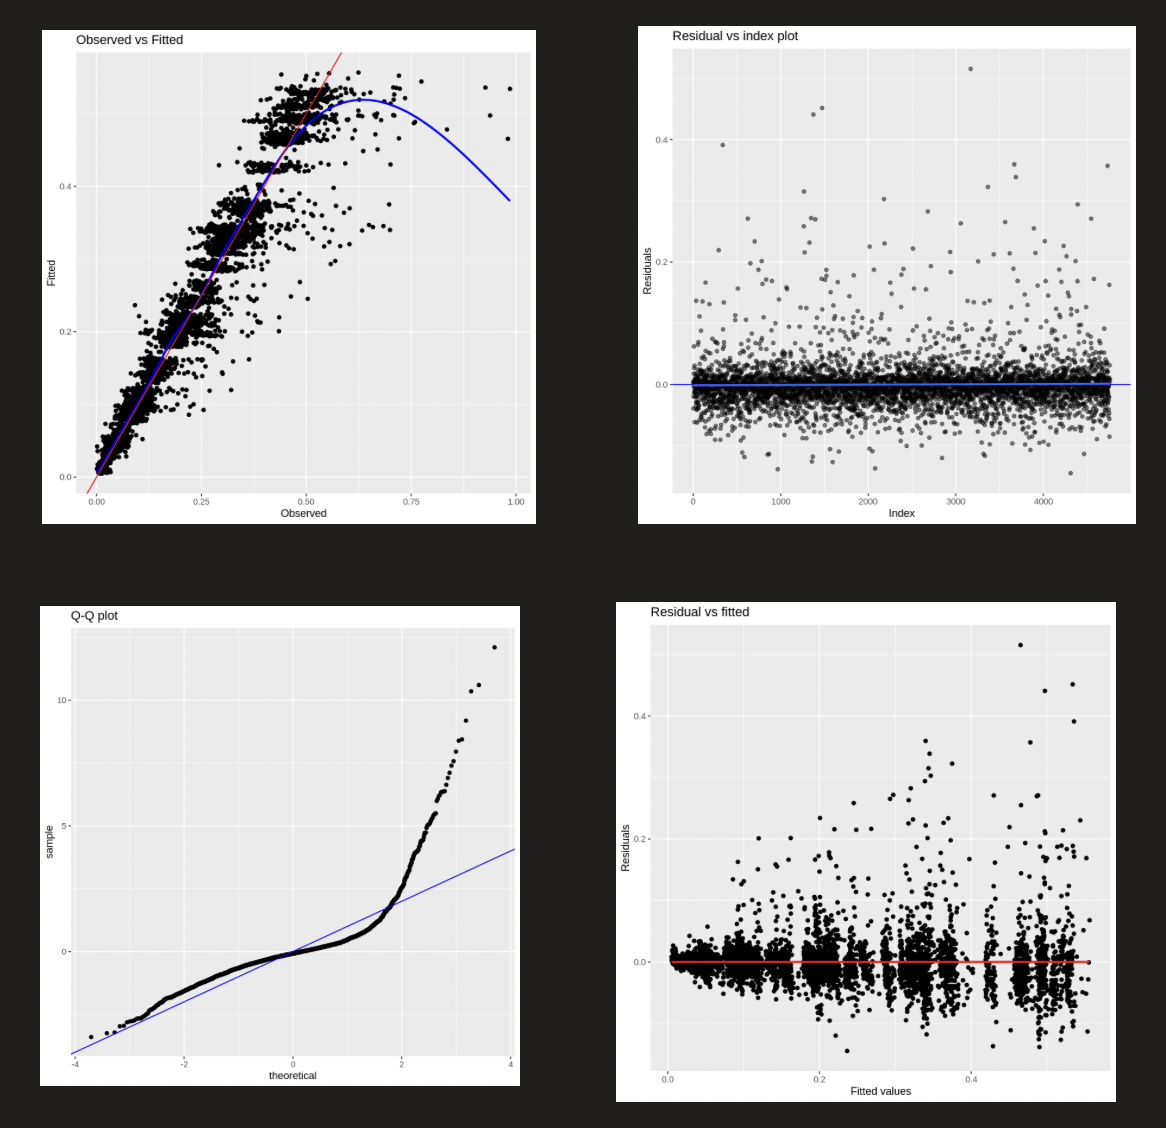

- I used the diagnostic plots to validate the model's assumptions to ensure the above regression model effectively predicts Walmart's weekly sales. These plots are used to check the presence of linearity, constant variance, normality, and independence of residuals, which are important for ensuring the model's integrity.
  - **Linearity**: The Observed vs Fitted plot shows that our model exhibits linearity within the middle ranges but deviates at the extremes, implying the presence of possible non-linear relationships.
  - **Constant Variance**: The Residual vs Fitted plot shows that the spread of residuals increases as the fitted values increase. This suggests the presence of heteroscedasticity, which means that the variance is not constant.
  - **Normality**: The Q-Q plot shows that the residuals, particularly at the tails, not aligned with 45-degree line and which say our model is not following a normal distribution.
  - **Independence**: The Residual vs Index plot shows no discernible pattern, which indicates that the residuals are independent across observations.

- Diagnostic plots shows violations in linear regression model assumptions, including non-linearity and heteroscedasticity. we can handle non-linearity and non-constant variance by transforming response variables or using non-linear models. And also resolving normality could involve transformations or robust regression techniques. but there is no autocorrelation between the features.

#### **Model selection**

- I aimed to find the most accurate regression model for Walmart's weekly sales by using several model selection criteria. The procees involves comparing different models using criteria such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), Mean Squared Prediction Error (MSPE), and adjusted R-squared ($AdjR^2$). These criteria prioritize information loss, evaluate prediction accuracy, and measure model fit.
- The models selected with AIC and BIC not included the features which are not important stores specifically store6, store23, store24, and store28,in our walmart data indicating minimum influence on sales predictions. The $AdjR^2$ method showed that including almost all features made the model more accurate. This shows how important it is to have a full set of predictors for accurate analysis. Comparing these models helps us identify the most efficient and precise model for predicting Walmart's weekly sales, ensuring reliable forecasts for informed business decisions.

#### **Generalised Linear Modeling:**.
- I used the Generalised Linear Model (GLM) to forecast Walmart's weekly sales, which follow a skewed non-normal distribution with the help of  Gamma distribution using square root link function which represent the data's positive and skewed characteristics. The GLM analysis showed significant coefficients for most stores, similar to the Multiple Linear Regression (MLR) analysis.But the GLM can handle the skewness in the data, highlighting the significance of seasonal marketing. Features like CPI have a significant p-value which suggests us that their influence on sales may be negligible. Even though having a higher Mean Squared Prediction Error (MSPE), GLM provides a robust foundation for understanding sales influences in non-normal data distributions.

## **Conclusion**

- A thorough analysis of Walmart store sales data makes it clear that holidays, store locations, and economic indicators like fuel prices and the consumer price index (CPI) are some of the most significant factors that affect weekly sales. Holidays, especially Thanksgiving and Christmas, have a big effect on sales, which suggests that seasonal promotions and purchasing behaviours have a big effect. Location of the store also impacts sales, showing that demographic and regional factors are very important for profitable sales.

- I learned how important it is to make decisions in retail operations based on data from this project.  Knowing how to predict and understand sales patterns based on things like holidays and economic factors can help with planning strategies and allocating resources. This analysis also shows how important it is to have different strategies for each store location, taking into account the store's specific features and the different kinds of customers that shop there. And also from this project it is clear how important it is to use statistical methods to get useful information from large datasets, which will ultimately help businesses make better decisions.


### **Further Study**

- Further research could help us understand how Walmart's sales work by including more factors like in-store promotions, the effect of online sales, and behavioural data about customers. Looking into how online and offline sales platforms work together would help us understand how multichannel selling affects sales in regular stores. Comparing business to competitors like costco could also help us find unique market advantages or places where we can improve.

- Looking into more complex predictive modelling methods, like machine learning algorithms, could help improve sales predictions and give more detailed information about what drives sales. Some methods,like neural networks and random forests,may show complex patterns and interactions that are hidden by more common statistical methods. Lastly,includes real-time data analysis could help us better understand how trends change over time and plan our long-term sales strategies.


## References:

Referenced used for this project
- https://www.geeksforgeeks.org/fishers-f-test-in-r-programming/
- https://www.rdocumentation.org/packages/leaps/versions/3.1/topics/regsubsets
- https://statsandr.com/blog/anova-in-r/
- In class Lecture Noteook solutions for all statistical techniques